# Information

This notebook was written by Bennet Juhls (bjuhls@awi.de) 
for the manuscript <br><strong>"Serpentine ice channels and their interaction with riverbed permafrost 
in the Lena River Delta, Russia".</strong><br>
Its using plotting data from 3 different sites and using input from:
1. In QGIS extracted Remote Sensing data (optical and radar) - /2_RS - <strong>(contact: B. Juhls, S. Antonova)</strong>
2. Geoelectrical (ERT) data - /3_ERT - <strong>(contact: M. Angelopolous, P. Overduin, N. Bobrov)</strong>
3. 2D thermal numerical model data - /4_MODEL - <strong> (contact: F. Miesner, M. Langer)</strong><br><br>

Berlin, 2021-03-12

# Python imports, reader, and functions

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib as mpl
import warnings
warnings.filterwarnings('ignore')



def readERT(path, profilename):
    #path = path to /3_ERT
    #profilename = e.g. "1_A"
    print(os.path.join(path, profilename + "_ERT_Distance.csv"))
    DistanceArr = np.genfromtxt(os.path.join(path, profilename + "_ERT_Distance.csv"), delimiter= "," ,skip_header=0)
    DepthArr = np.genfromtxt(os.path.join(path, profilename + "_ERT_Depths.csv"), delimiter= "," ,skip_header=0)
    ResistivityArr = np.genfromtxt(os.path.join(path, profilename + "_ERT_Resistivity.csv"), delimiter= "," ,skip_header=0)
    DistanceList = list(zip(*np.genfromtxt(os.path.join(path, profilename + "_ERT_Waterdepth.csv"), delimiter= "," ,skip_header=1)))[0]
    WaterdepthList = list(zip(*np.genfromtxt(os.path.join(path, profilename + "_ERT_Waterdepth.csv"), delimiter= "," ,skip_header=1)))[1]
    outERT = [DistanceArr, DepthArr, ResistivityArr, DistanceList, WaterdepthList]
    return outERT

def readRS(path, profilename):
    #path = path to /2_RS/Extraction
    #profilename = e.g. "1_A"
    Distance_Radar= list(zip(*np.genfromtxt(os.path.join(path, profilename + "_Radar.csv"), delimiter= "," ,skip_header=1)))[0]
    Refl_Radar = list(zip(*np.genfromtxt(os.path.join(path, profilename + "_Radar.csv"), delimiter= "," ,skip_header=1)))[3]
    try:
        Distance_Optical = list(zip(*np.genfromtxt(os.path.join(path, profilename + "_Optical.csv"), delimiter= "," ,skip_header=1)))[0]
        Refl_Optical = list(zip(*np.genfromtxt(os.path.join(path, profilename + "_Optical.csv"), delimiter= "," ,skip_header=1)))[3]
    except:
        print("RS has no optical data, filling both arrays with radar")
        Distance_Optical = Distance_Radar
        Refl_Optical = Refl_Radar
        pass
        #Distance_Optical = np.linspace(0, np.max(Distance_Optical), len(Distance_Optical))
        #Refl_Optical = np.linspace(np.nan, np.nan, len(Distance_Optical))
    outRS = [Distance_Optical, Refl_Optical, Distance_Radar, Refl_Radar]
    return outRS

def readMODEL(path, profilename):
    #path = path to /4_Model
    #profilename = e.g. "ECR_1_7"  ## = 1A
    Model_in = pd.read_csv(os.path.join(path, profilename + "_7.0dt_2000.0years_steadystate_init_0.00maxSnow_Horz_Vert_WaterDepth_T_Water.csv"), sep="\t")
    Dim = len(np.where(Model_in["horz distance "]-np.roll(Model_in["horz distance "],1)!=0)[0])
    print(Dim)
    splitted_dist = np.array_split(Model_in["horz distance "], Dim)
    DistanceArr = np.array(splitted_dist).transpose()
    splitted_depth = np.array_split(Model_in[" depth "], Dim)
    DepthArr = np.array(splitted_depth).transpose()
    splitted_temp = np.array_split(Model_in[" temperature "], Dim)
    TempArr = np.array(splitted_temp).transpose()
    outModel = [DistanceArr, DepthArr, TempArr]
    return outModel


#### define paths ####
PathERT = "/all_mounts/masp26/SMOS_artic/BennetProjects/Serpentine/data/3_ERT/cropped/"
PathRS = "/all_mounts/masp26/SMOS_artic/BennetProjects/Serpentine/data/2_RS/Extraction/"
PathModel = "/all_mounts/masp26/SMOS_artic/BennetProjects/Serpentine/data/4_Model/v_20200308/"

PathFigExport = "/all_mounts/masp26/SMOS_artic/BennetProjects/Serpentine/SerpChan/_figures/ProfilePlots/"

# Profile 1A

/all_mounts/masp26/SMOS_artic/BennetProjects/Serpentine/data/3_ERT/cropped/1_A_ERT_Distance.csv
347


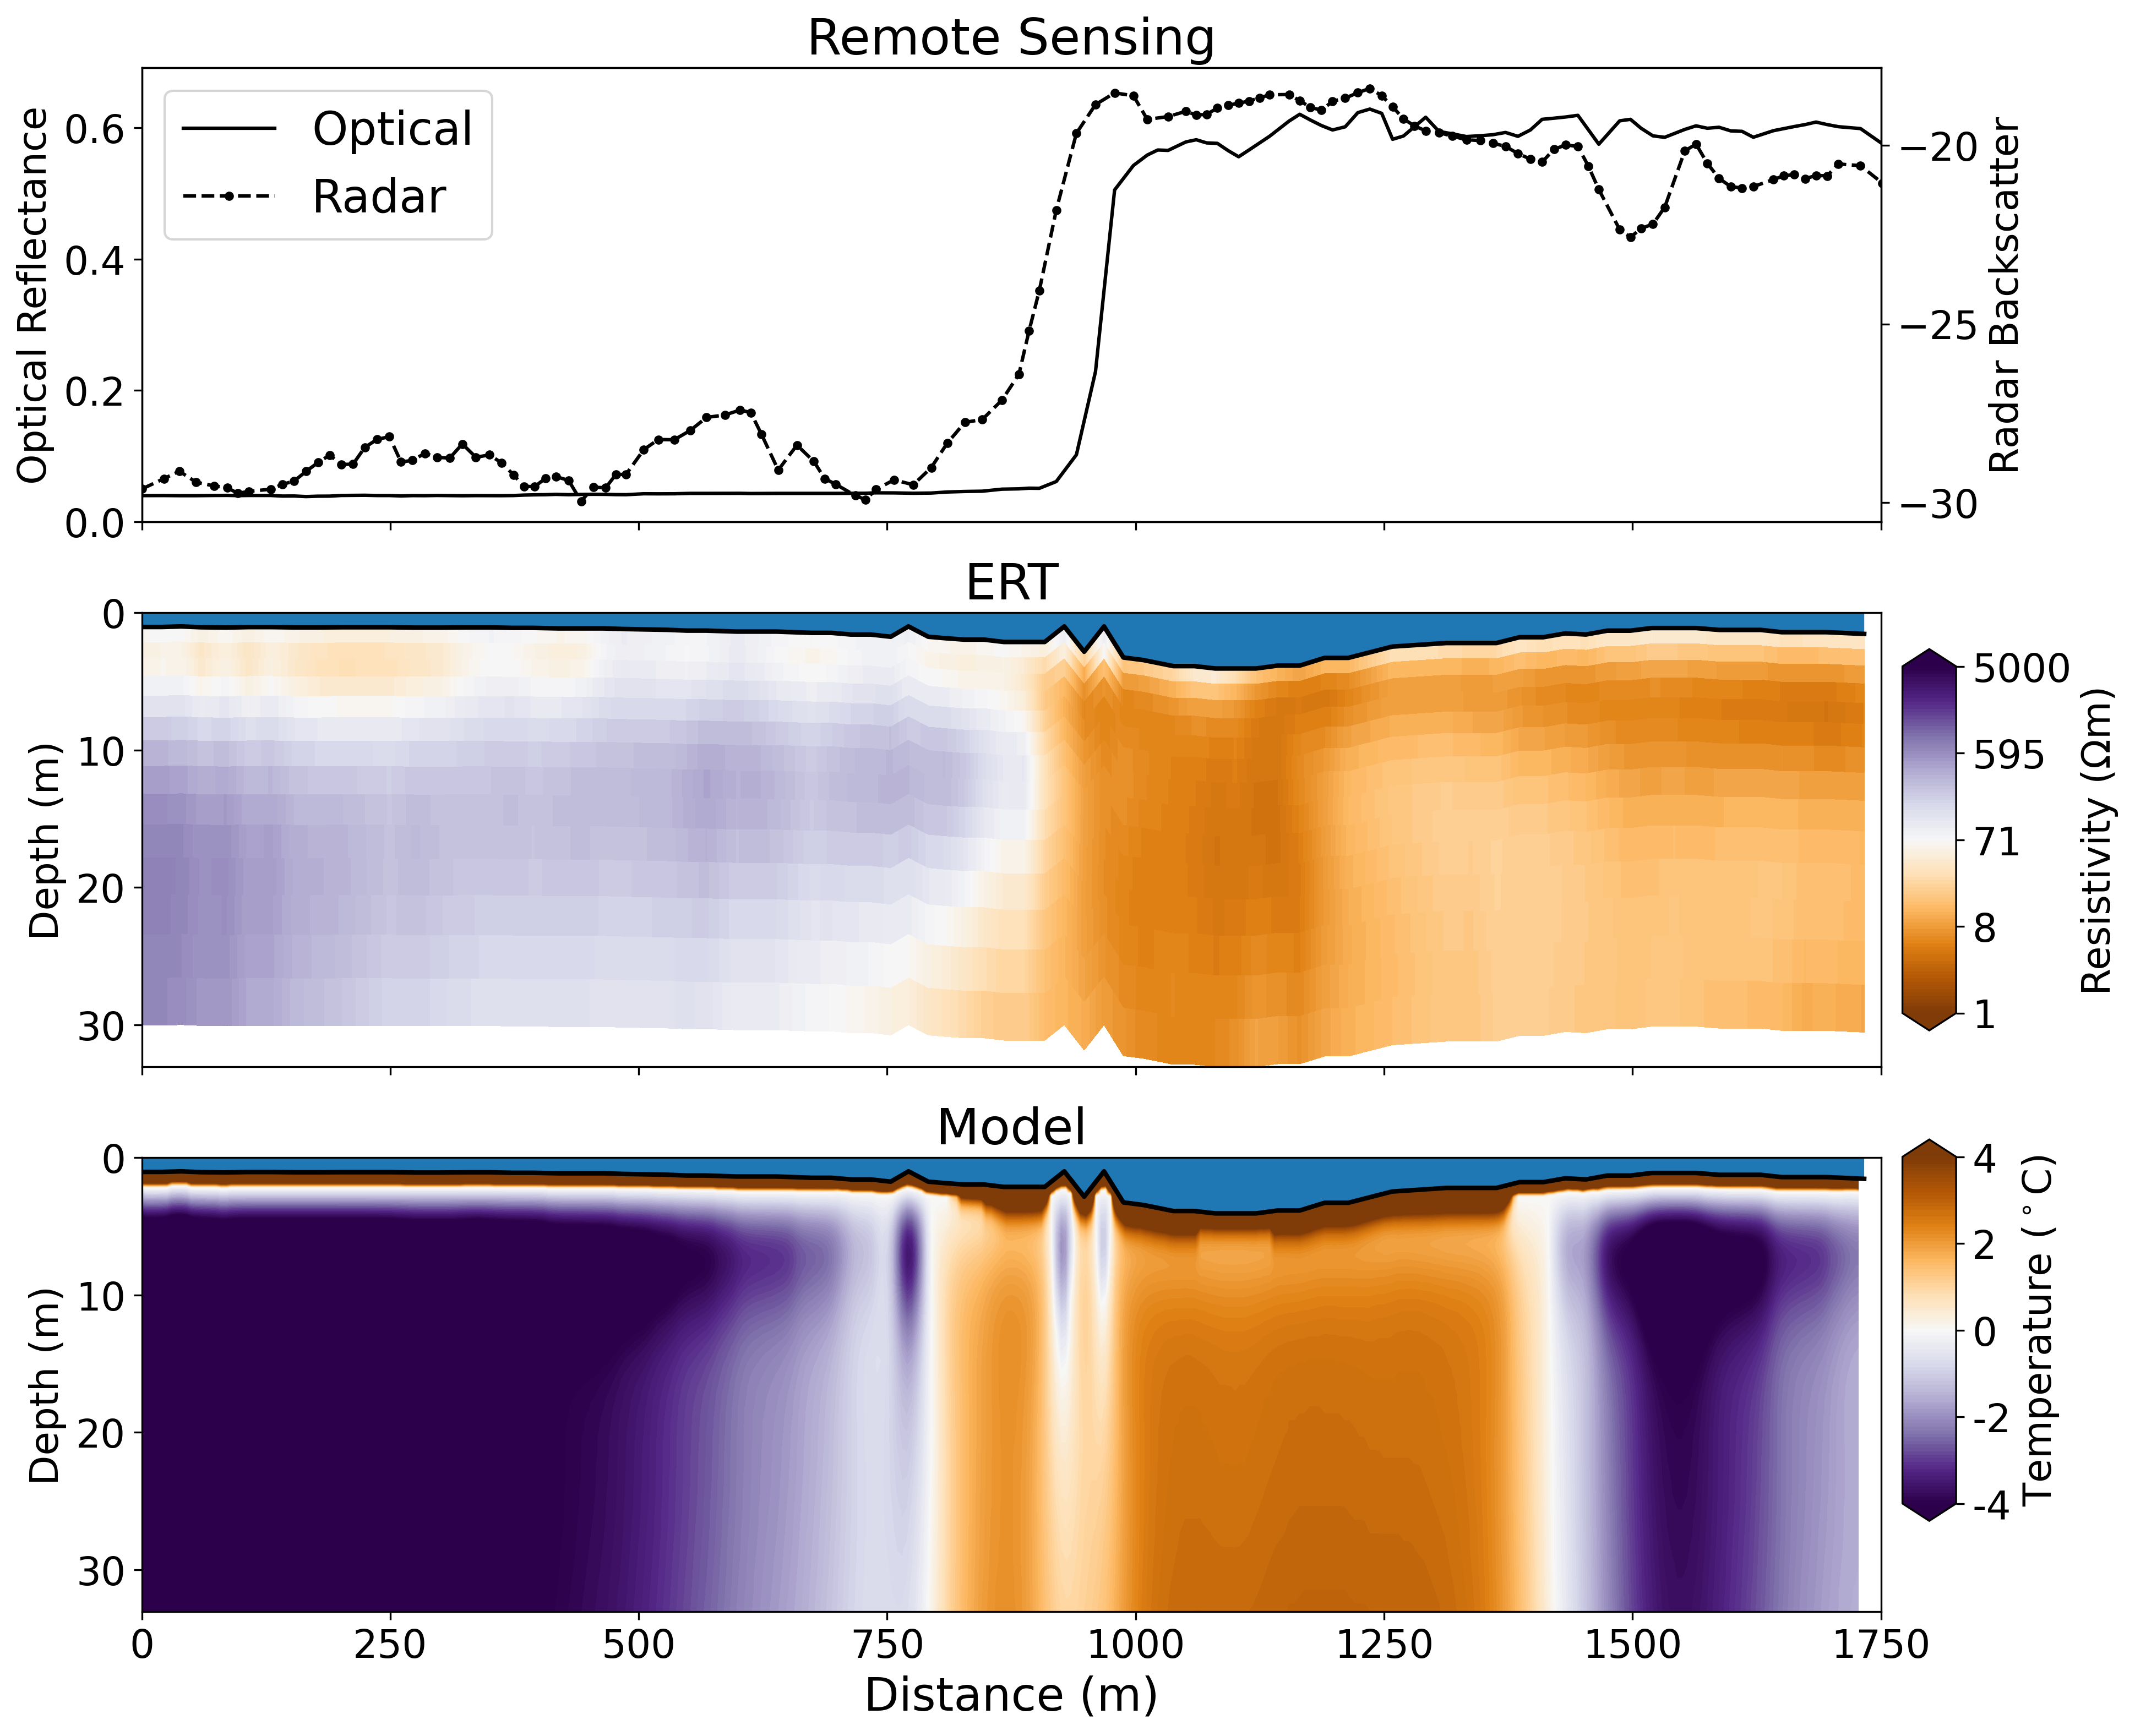

In [11]:
ERT = readERT(PathERT, "1_A")
RS = readRS(PathRS, "1_A")
Model = readMODEL(PathModel, "ECR_1")

f, (( ax0, ax1, ax2 )) = plt.subplots(3, 1,figsize=(13,11), dpi=300,sharex =True)

### Optical RS ###
ax0.set_title("Remote Sensing", fontsize=22)
ax0.plot(RS[0],np.array(RS[1])/10000, "k-", label="Optical")
ax0.plot(-10000, 0.3, "k.--", label="Radar")
ax0.set_ylabel("Optical Reflectance", c= "k", fontsize=17)
ax0.set_xticks([])
ax0.tick_params(axis='both', which='major', labelsize=17)
ax0.legend(loc=2, fontsize=20)
#ax0.text(0, np.nanmax(np.array(RS[1])/10000)+0.05, "A", fontsize=30)
#ax0.text(1750-35, np.nanmax(np.array(RS[1])/10000)+0.05, "A'", fontsize=30)
ax0.set_ylim(0,np.nanmax(np.array(RS[1])/10000) + (np.nanmax(np.array(RS[1])/10000)*0.1))
### Radar RS ###
ax0a = ax0.twinx()
ax0a.plot(RS[2],RS[3], "k.--", label="Radar")
ax0a.set_ylabel("Radar Backscatter", c= "k", fontsize=17)
ax0a.tick_params(axis='both', which='major', labelsize=17)

### Bathymetry Line ####
#ax0b = ax0.twinx()
#ax0b.plot(d_row[0], bathy, "k-")



####### ERT #######
ax1.set_title("ERT", fontsize=22)
cmap = mpl.cm.PuOr

min_v= np.log(1)
max_v= np.log(5000)
levels= np.linspace(min_v,max_v,100)

pcm = ax1.contourf(ERT[0], ERT[1], np.log(ERT[2]),
            cmap = cmap, vmin=min_v, vmax=max_v,
                  levels= levels,extend='both')
cbaxes = f.add_axes([0.89, 0.4, 0.025, 0.21])
cb=f.colorbar(pcm, orientation="vertical", cax = cbaxes, ticks=np.linspace(min_v, max_v, 5) )#ticks=ticks
cb.ax.set_yticklabels([str(int(round(np.exp(x), 0))) for x in np.linspace(min_v, max_v, 5)], fontsize=17)
cb.set_label("Resistivity (\u03A9m)", fontsize=17)

ax1.plot(ERT[3], ERT[4], "k-", lw=2)
ax1.fill_between(ERT[3], [0 for i in ERT[3]], ERT[4], "grey")

ax1.set_xlim(-20,1800)
ax1.invert_yaxis()
ax1.tick_params(axis='both', which='major', labelsize=15)

ax1.set_xticks([])
ax1.tick_params(axis='both', which='major', labelsize=17)
ax1.set_ylabel("Depth (m)", c= "k", fontsize=17)


######## MODEL ######
ax2.set_title("Model", fontsize=22)
min_v= -4.
max_v= 4.
levels= np.linspace(min_v,max_v,100)
cmap = mpl.cm.PuOr_r

pcm = ax2.contourf(Model[0], Model[1], Model[2],
            cmap = cmap, vmin=min_v, vmax=max_v,
                  levels= levels,extend='both')

cbaxes = f.add_axes([0.89, 0.13, 0.025, 0.21]) 

cb=f.colorbar(pcm, orientation="vertical", cax = cbaxes, ticks=[-4, -2, 0, 2, 4] )
cb.ax.set_yticklabels([ -4, -2, 0, 2, 4], fontsize=17)
cb.set_label("Temperature ($^\circ$C)", fontsize=17)

ax2.plot(ERT[3], ERT[4], "k-", lw=2)
ax2.fill_between(ERT[3], [0 for i in ERT[3]], ERT[4], "grey")

ax2.set_xlabel("Distance (m)", fontsize=20)
ax2.tick_params(axis='both', which='major', labelsize=15)

ax2.set_ylabel("Depth (m)", c= "k", fontsize=17)
ax2.tick_params(axis='both', which='major', labelsize=17)
ax2.invert_yaxis()
ax2.set_ylim(np.nanmax(ERT[1]), 0)
ax2.invert_xaxis()

lenght = 1750
spcing = lenght / 250 + 1

#ax2.set_xlim(850,0)
ax2.set_xlim(0, lenght)
ax2.xaxis.set_ticks(np.linspace(lenght, 0, int(spcing)))
ax2.xaxis.set_ticks(np.linspace(0, lenght,  int(spcing)))
ax2.set_xticklabels(list(map(int, np.linspace(0, lenght, int(spcing)))))
##############################################


plt.gcf().subplots_adjust(left=0.07, right=0.88, bottom=0.08, top = 0.93)
plt.savefig(PathFigExport + "Profile_1A.png", dpi=300)

plt.show()

# Profile 1B

/all_mounts/masp26/SMOS_artic/BennetProjects/Serpentine/data/3_ERT/cropped/1_B_ERT_Distance.csv
108


/home/bjuhls/.local/lib/python3.6/site-packages/ipykernel_launcher.py:49: MatplotlibDeprecationWarning: Since 3.2, the parameter *where* must have the same size as [0.0 23.436 45.189 70.037 91.878 117.61 142.46 168.19 196.8 227.4 253.01
 280.85 303.97 328.48 355.61 383.27 407.62 431.27 454.59 478.39 496.98
 519.94 539.0] in fill_betweenx(). This will become an error two minor releases later.
/home/bjuhls/.local/lib/python3.6/site-packages/ipykernel_launcher.py:78: MatplotlibDeprecationWarning: Since 3.2, the parameter *where* must have the same size as [0.0 23.436 45.189 70.037 91.878 117.61 142.46 168.19 196.8 227.4 253.01
 280.85 303.97 328.48 355.61 383.27 407.62 431.27 454.59 478.39 496.98
 519.94 539.0] in fill_betweenx(). This will become an error two minor releases later.


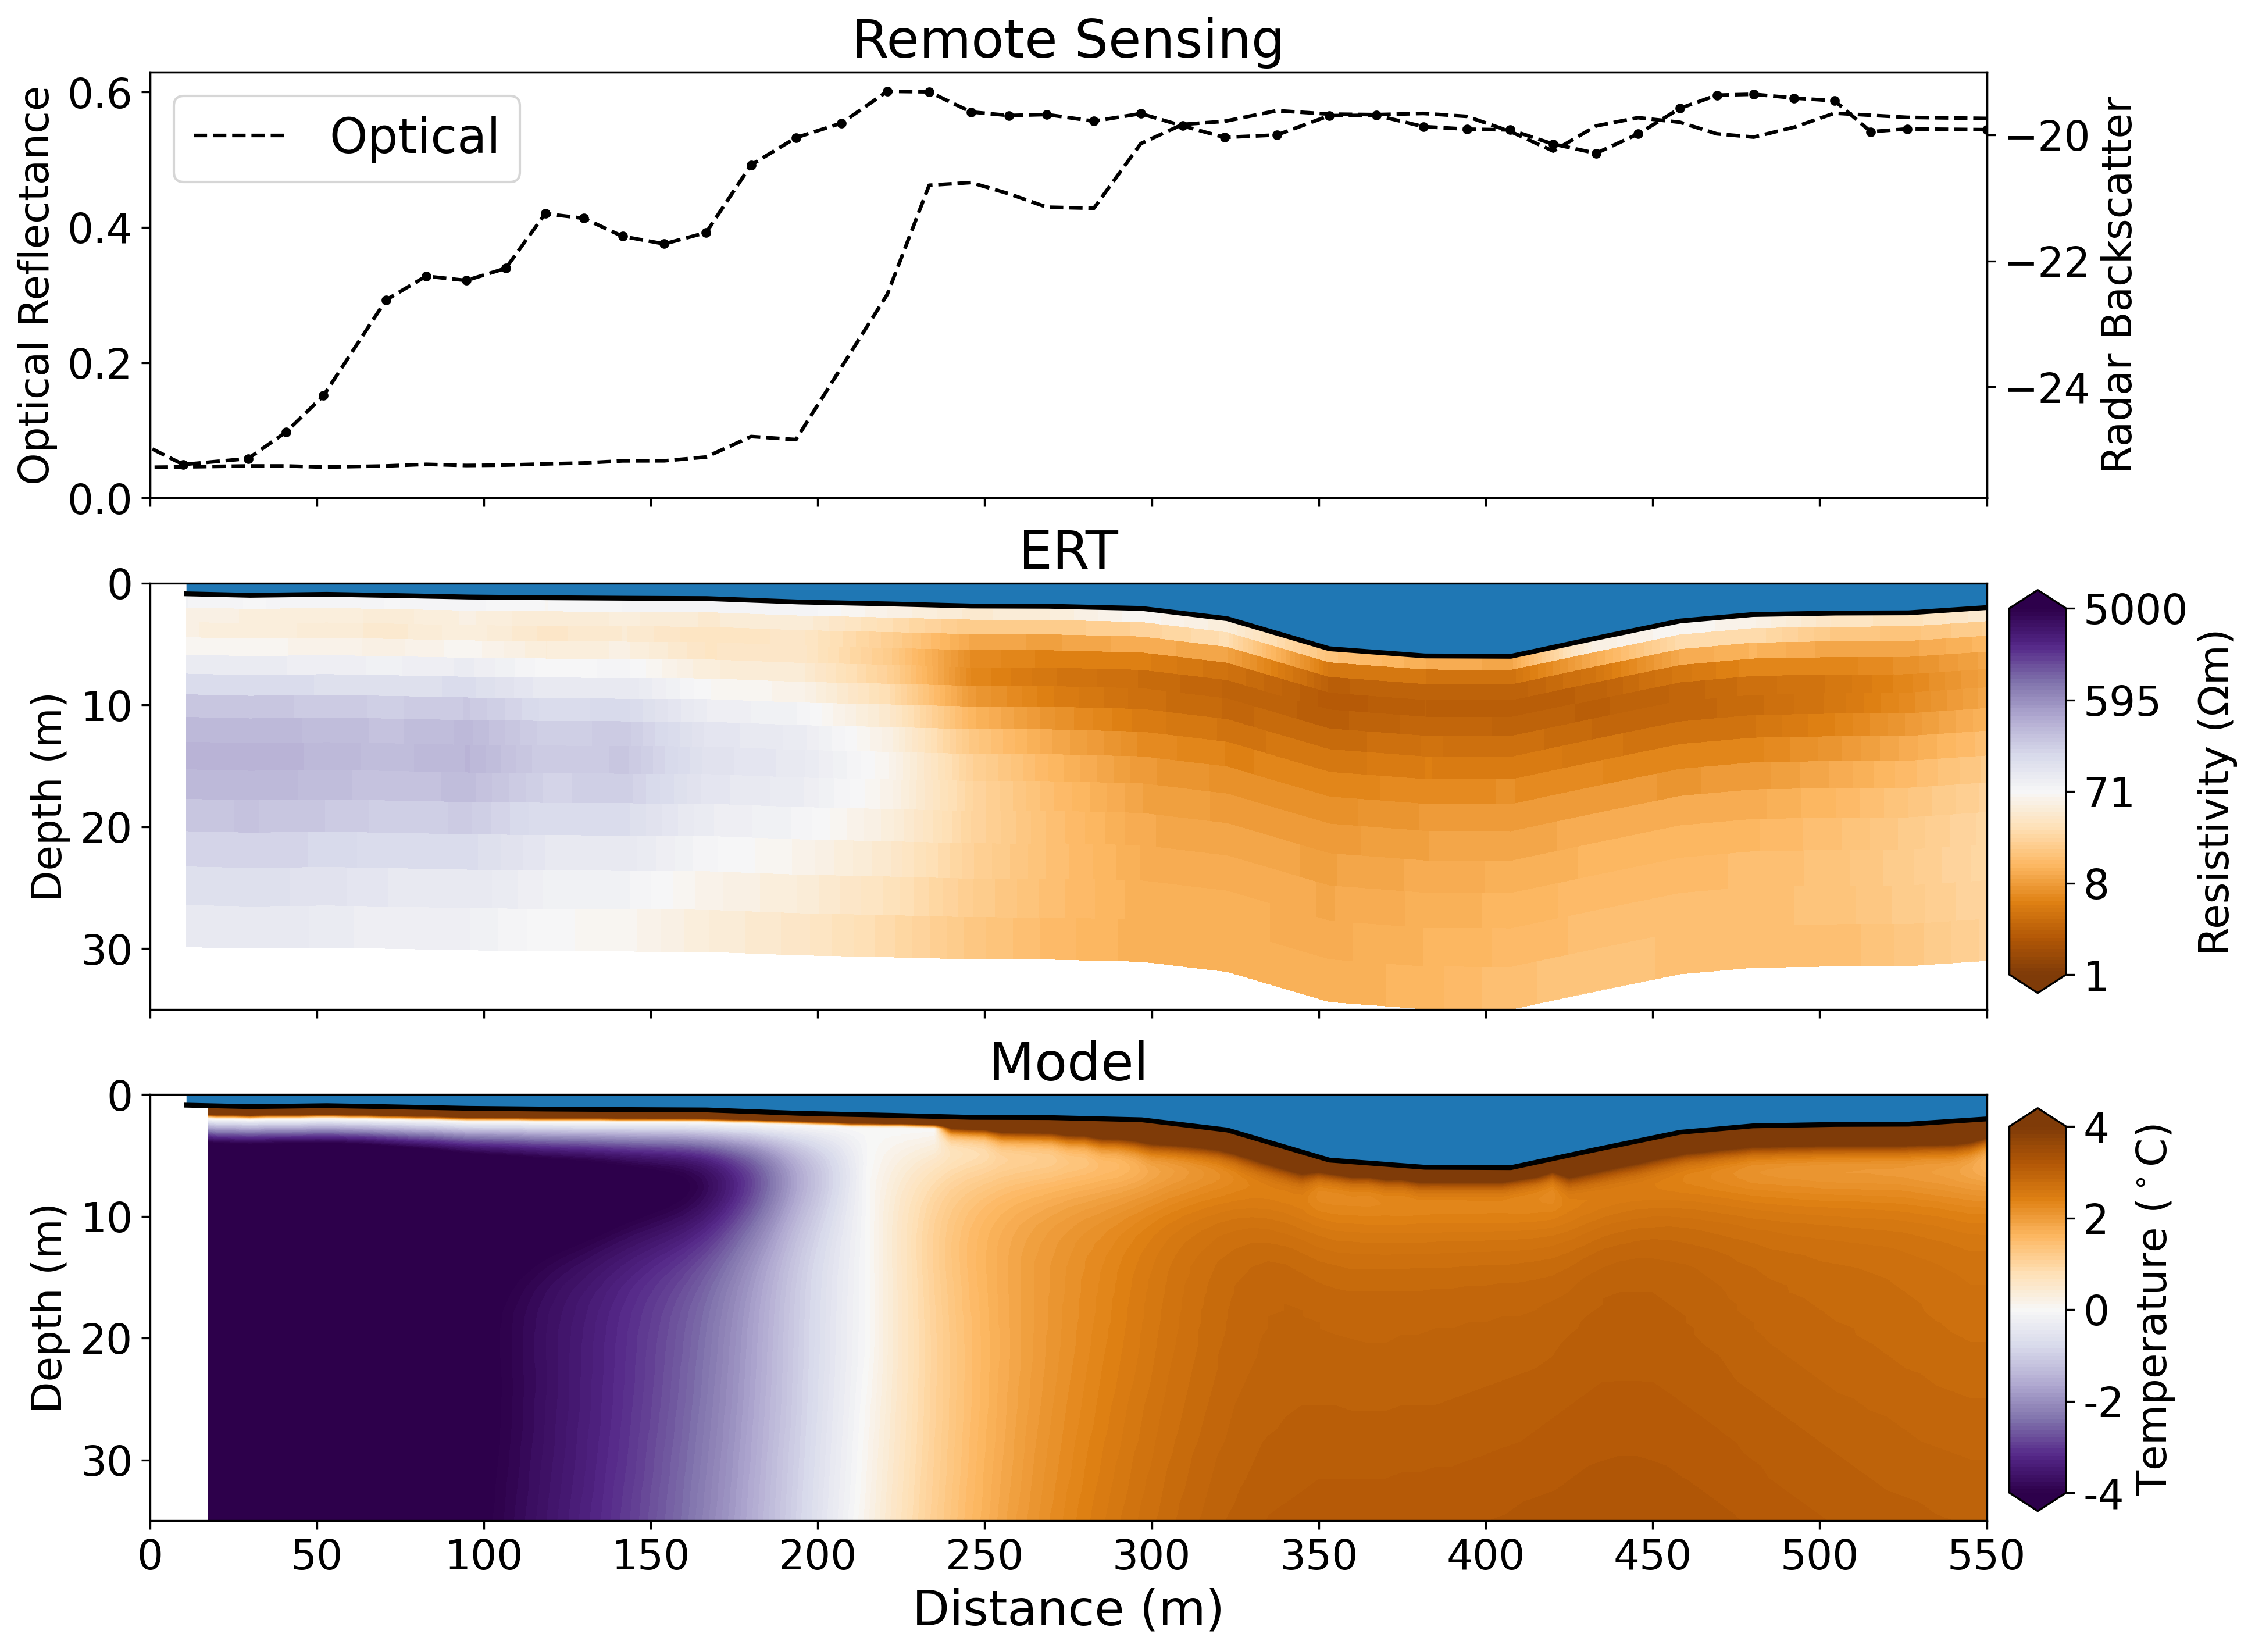

In [158]:
ERT = readERT(PathERT, "1_B")
RS = readRS(PathRS, "1_B")
Model = readMODEL(PathModel, "ECR_2")

f, (( ax0, ax1, ax2 )) = plt.subplots(3, 1,figsize=(13,11), dpi=300,sharex =True)

### Optical RS ###
ax0.set_title("Remote Sensing", fontsize=22)
ax0.plot(RS[0],np.array(RS[1])/10000, "k--", label="Optical")
#ax0.plot(-10000, 0.3, "k.--", label="Radar")
ax0.set_ylabel("Optical Reflectance", c= "k", fontsize=17)
ax0.set_xticks([])
ax0.tick_params(axis='both', which='major', labelsize=17)
ax0.legend(loc=2, fontsize=20)
ax0.set_ylim(0,np.nanmax(np.array(RS[1])/10000) + (np.nanmax(np.array(RS[1])/10000)*0.1))
#ax0.text(-100, np.nanmax(np.array(RS[1])/10000)+0.05, "B'", fontsize=30)
#ax0.text(550-55, np.nanmax(np.array(RS[1])/10000)+0.05, "B", fontsize=30)

### Radar RS ###
ax0a = ax0.twinx()
ax0a.plot(RS[2],RS[3], "k.--", label="Radar")
ax0a.set_ylabel("Radar Backscatter", c= "k", fontsize=17)
ax0a.tick_params(axis='both', which='major', labelsize=17)
ax0.invert_xaxis()

### Bathymetry Line ####
#ax0b = ax0.twinx()
#ax0b.plot(d_row[0], bathy, "k-")



####### ERT #######
ax1.set_title("ERT", fontsize=22)
cmap = mpl.cm.PuOr

min_v= np.log(1)
max_v= np.log(5000)
levels= np.linspace(min_v,max_v,100)

pcm = ax1.contourf(ERT[0], ERT[1], np.log(ERT[2]),
            cmap = cmap, vmin=min_v, vmax=max_v,
                  levels= levels,extend='both')
cbaxes = f.add_axes([0.89, 0.4, 0.025, 0.21])
cb=f.colorbar(pcm, orientation="vertical", cax = cbaxes, ticks=np.linspace(min_v, max_v, 5) )#ticks=ticks
cb.ax.set_yticklabels([str(int(round(np.exp(x), 0))) for x in np.linspace(min_v, max_v, 5)], fontsize=17)
cb.set_label("Resistivity (\u03A9m)", fontsize=17)

ax1.plot(ERT[3], ERT[4], "k-", lw=2)
ax1.fill_between(ERT[3], [0 for i in ERT[3]], ERT[4], "grey")

#ax1.set_xlim(-20,1800)
ax1.invert_yaxis()
ax1.tick_params(axis='both', which='major', labelsize=15)

ax1.set_xticks([])
ax1.tick_params(axis='both', which='major', labelsize=17)
ax1.set_ylabel("Depth (m)", c= "k", fontsize=17)
ax1.invert_xaxis()

######## MODEL ######
ax2.set_title("Model", fontsize=22)
min_v= -4.
max_v= 4.
levels= np.linspace(min_v,max_v,100)
cmap = mpl.cm.PuOr_r

pcm = ax2.contourf(Model[0], Model[1], Model[2],
            cmap = cmap, vmin=min_v, vmax=max_v,
                  levels= levels,extend='both')

cbaxes = f.add_axes([0.89, 0.13, 0.025, 0.21]) 

cb=f.colorbar(pcm, orientation="vertical", cax = cbaxes, ticks=[-4, -2, 0, 2, 4] )
cb.ax.set_yticklabels([ -4, -2, 0, 2, 4], fontsize=17)
cb.set_label("Temperature ($^\circ$C)", fontsize=17)

ax2.plot(ERT[3], ERT[4], "k-", lw=2)
ax2.fill_between(ERT[3], [0 for i in ERT[3]], ERT[4], "grey")

ax2.set_xlabel("Distance (m)", fontsize=20)
ax2.tick_params(axis='both', which='major', labelsize=15)

ax2.set_ylabel("Depth (m)", c= "k", fontsize=17)
ax2.tick_params(axis='both', which='major', labelsize=17)
ax2.invert_yaxis()
ax2.set_ylim(np.nanmax(ERT[1]), 0)
ax2.invert_xaxis()

lenght = 550
spcing = lenght / 50 + 1

ax2.set_xlim(lenght,0)
#ax2.set_xlim(0, lenght)
ax2.xaxis.set_ticks(np.linspace(lenght, 0, int(spcing)))
#ax2.xaxis.set_ticks(np.linspace(0, lenght,  int(spcing)))
ax2.set_xticklabels(list(map(int, np.linspace(0, lenght, int(spcing)))))

##############################################

plt.gcf().subplots_adjust(left=0.07, right=0.88, bottom=0.08, top = 0.93)
plt.savefig(PathFigExport + "Profile_1B.png", dpi=300)

plt.show()

# Profile 2A

/all_mounts/masp26/SMOS_artic/BennetProjects/Serpentine/data/3_ERT/cropped/2_A_ERT_Distance.csv
174


/home/bjuhls/.local/lib/python3.6/site-packages/ipykernel_launcher.py:50: MatplotlibDeprecationWarning: Since 3.2, the parameter *where* must have the same size as [0.0 8.858581632653062 17.717163265306123 26.575744897959183
 35.434326530612246 44.29290816326531 53.151489795918366 62.01007142857143
 70.86865306122449 79.72723469387755 88.58581632653062 97.44439795918368
 106.30297959183673 115.1615612244898 124.02014285714286
 132.87872448979593 141.73730612244898 150.59588775510204
 159.4544693877551 168.31305102040818 177.17163265306124 186.0302142857143
 194.88879591836735 203.7473775510204 212.60595918367346
 221.46454081632655 230.3231224489796 239.18170408163266
 248.04028571428572 256.8988673469388 265.75744897959186 274.6160306122449
 283.47461224489797 292.333193877551 301.1917755102041 310.05035714285714
 318.9089387755102 327.76752040816325 336.62610204081636 345.4846836734694
 354.3432653061225 363.20184693877553 372.0604285714286 380.91901020408164
 389.7775918367347 398.6

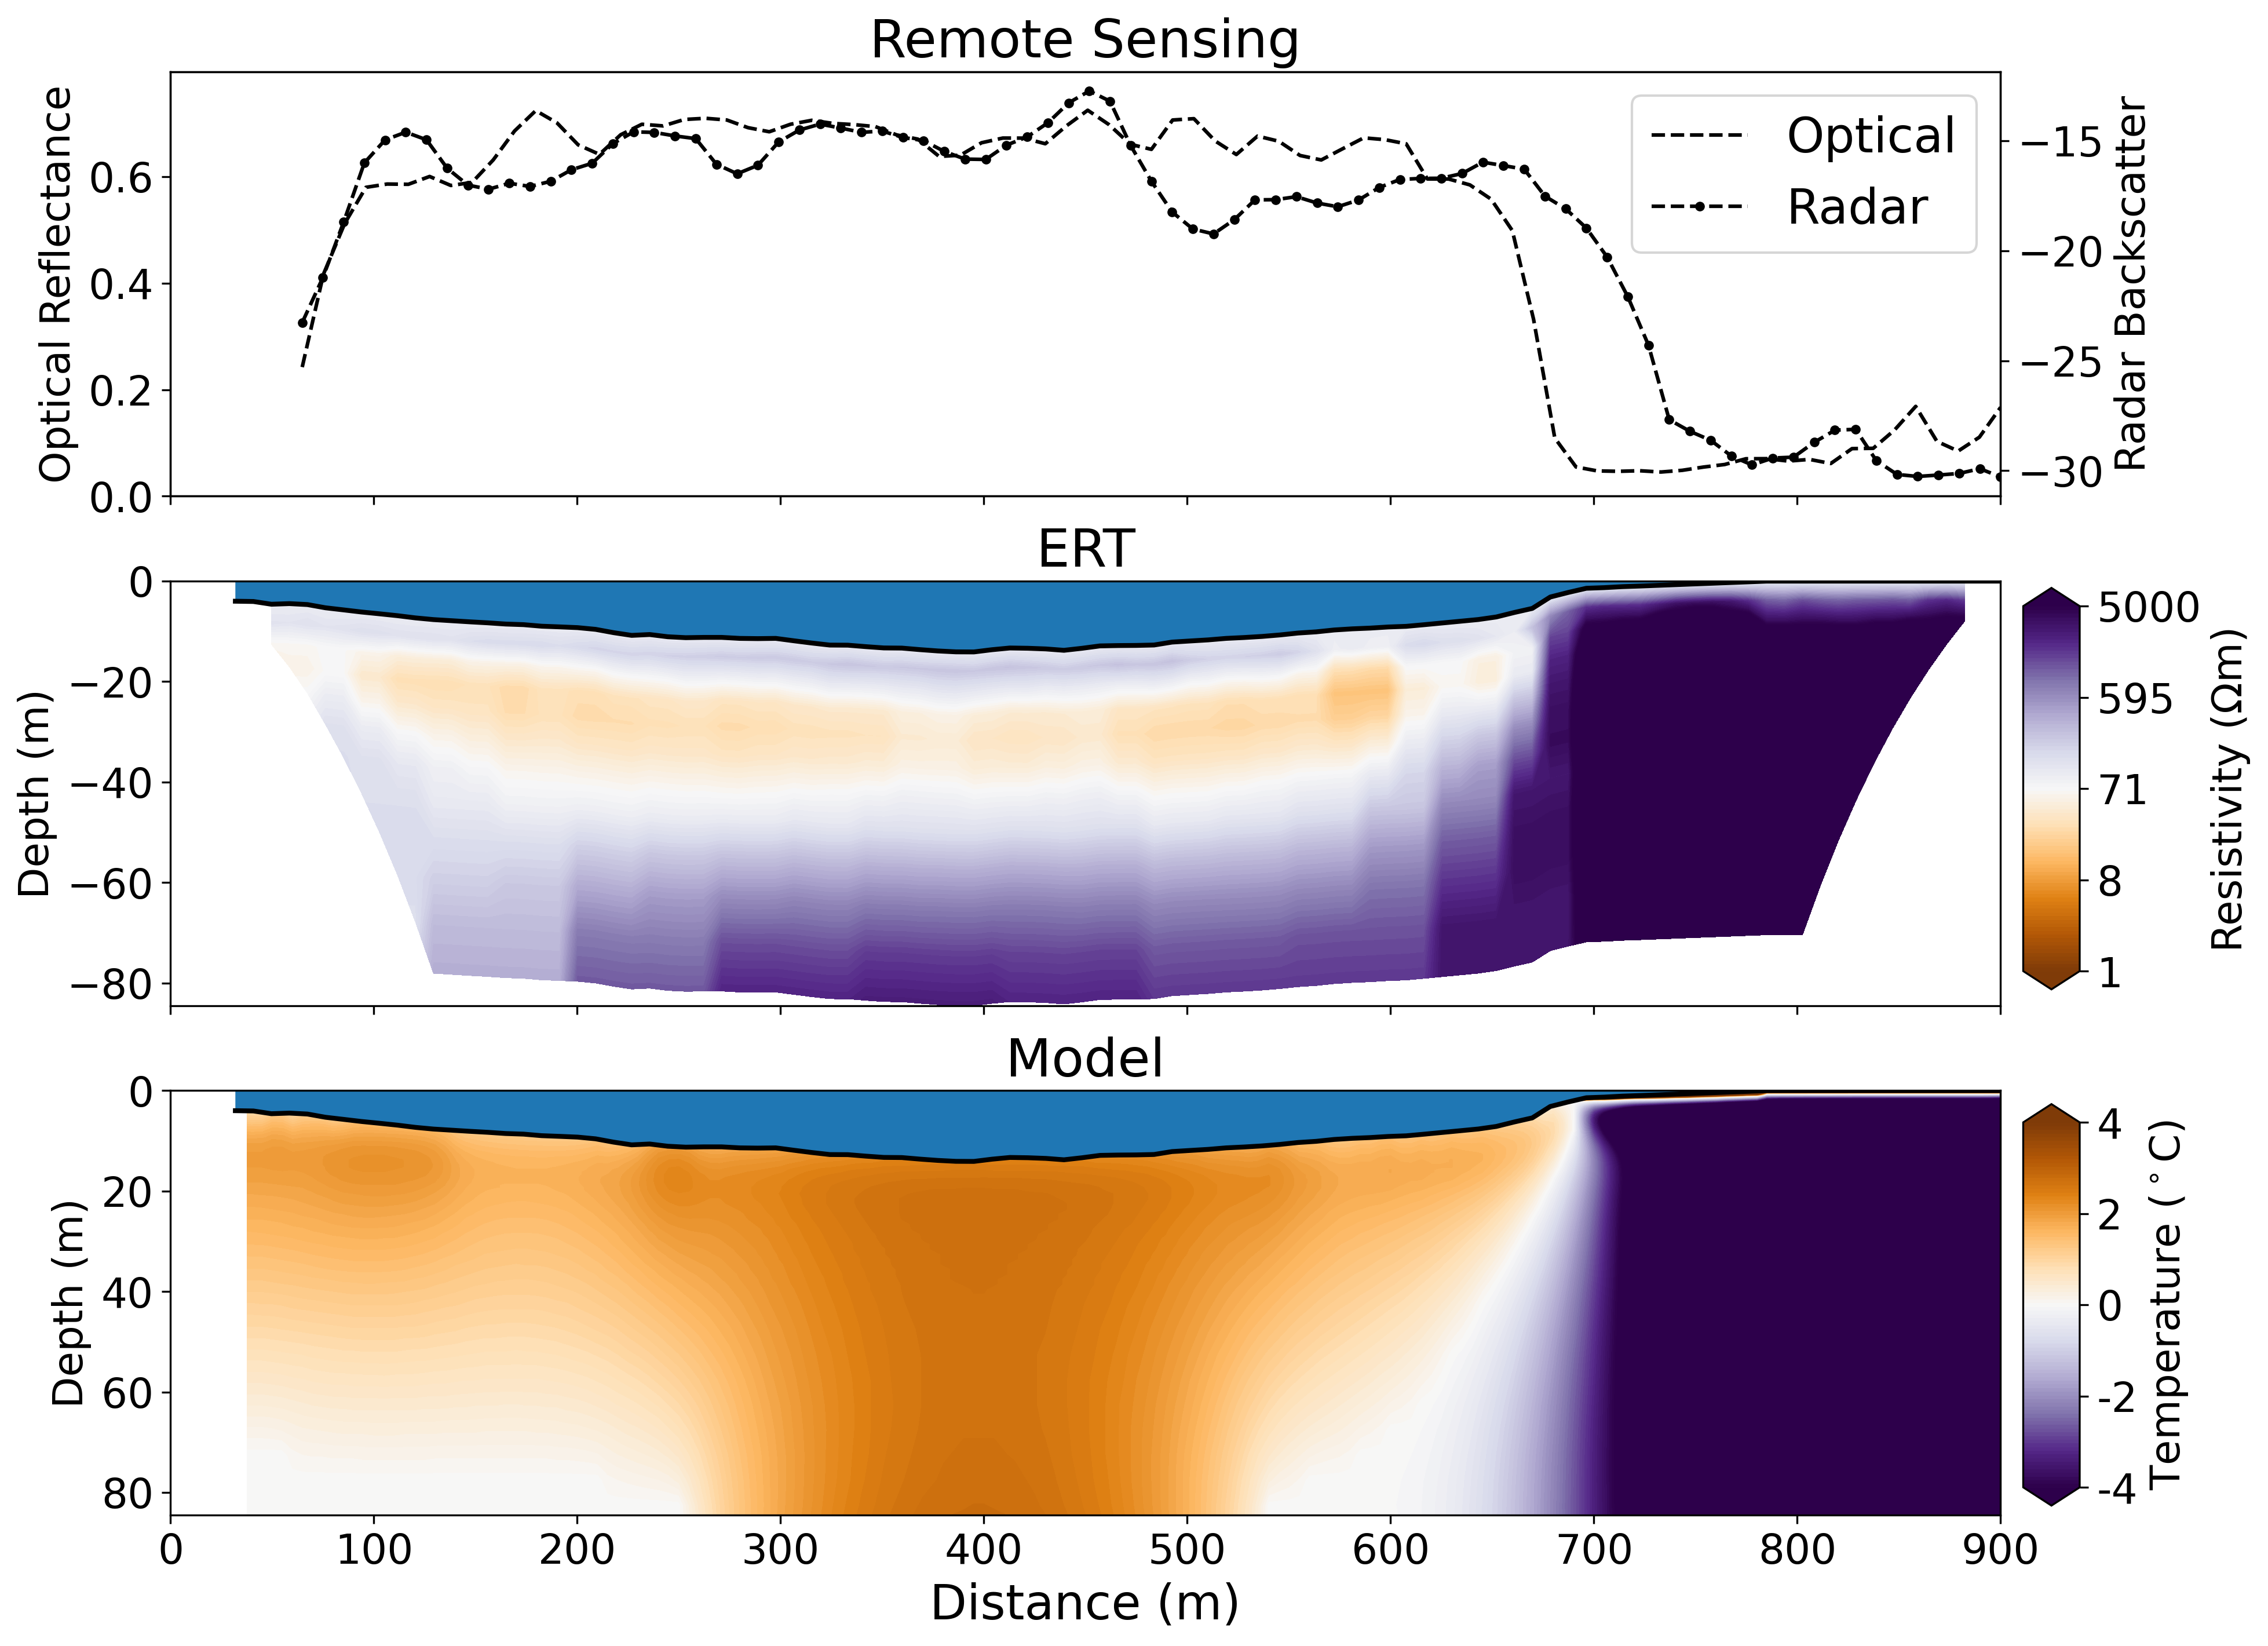

In [159]:
ERT = readERT(PathERT, "2_A")
RS = readRS(PathRS, "2_A")
Model = readMODEL(PathModel, "ECR_3")

f, (( ax0, ax1, ax2 )) = plt.subplots(3, 1,figsize=(13,11), dpi=300,sharex =True)

### Optical RS ###
ax0.set_title("Remote Sensing", fontsize=22)
ax0.plot(RS[0][::-1],np.array(RS[1])/10000, "k--", label="Optical")
ax0.plot(-10000, 0.3, "k.--", label="Radar")
ax0.set_ylabel("Optical Reflectance", c= "k", fontsize=17)
ax0.set_xticks([])
ax0.tick_params(axis='both', which='major', labelsize=17)
ax0.legend(loc=1, fontsize=20)
ax0.set_ylim(0,np.nanmax(np.array(RS[1])/10000) + (np.nanmax(np.array(RS[1])/10000)*0.1))
#ax0.text(0, np.nanmax(np.array(RS[1])/10000)+0.05, "A", fontsize=30)
#ax0.invert_xaxis()
#ax0.text(1750-35, np.nanmax(np.array(RS[1])/10000)+0.05, "A'", fontsize=30)

### Radar RS ###
ax0a = ax0.twinx()
ax0a.plot(RS[2][::-1],RS[3], "k.--", label="Radar")
ax0a.set_ylabel("Radar Backscatter", c= "k", fontsize=17)
ax0a.tick_params(axis='both', which='major', labelsize=17)
ax0a.invert_xaxis()

### Bathymetry Line ####
#ax0b = ax0.twinx()
#ax0b.plot(d_row[0], bathy, "k-")



####### ERT #######
ax1.set_title("ERT", fontsize=22)
cmap = mpl.cm.PuOr

min_v= np.log(1)
max_v= np.log(5000)
levels= np.linspace(min_v,max_v,100)

pcm = ax1.contourf(ERT[0], ERT[1], np.log(ERT[2]),
            cmap = cmap, vmin=min_v, vmax=max_v,
                  levels= levels,extend='both')
cbaxes = f.add_axes([0.89, 0.4, 0.025, 0.21])
cb=f.colorbar(pcm, orientation="vertical", cax = cbaxes, ticks=np.linspace(min_v, max_v, 5) )#ticks=ticks
cb.ax.set_yticklabels([str(int(round(np.exp(x), 0))) for x in np.linspace(min_v, max_v, 5)], fontsize=17)
cb.set_label("Resistivity (\u03A9m)", fontsize=17)

ax1.plot(ERT[3], ERT[4], "k-", lw=2)
ax1.fill_between(ERT[3], [0 for i in ERT[3]], ERT[4], "grey")

#ax1.set_xlim(-20,1800)
#ax1.invert_yaxis()
ax1.tick_params(axis='both', which='major', labelsize=15)

ax1.set_xticks([])
ax1.tick_params(axis='both', which='major', labelsize=17)
ax1.set_ylabel("Depth (m)", c= "k", fontsize=17)
ax1.invert_xaxis()



######## MODEL ######
ax2.set_title("Model", fontsize=22)
min_v= -4.
max_v= 4.
levels= np.linspace(min_v,max_v,100)
cmap = mpl.cm.PuOr_r

pcm = ax2.contourf(Model[0], Model[1], Model[2],
            cmap = cmap, vmin=min_v, vmax=max_v,
                  levels= levels,extend='both')

cbaxes = f.add_axes([0.89, 0.13, 0.025, 0.21]) 

cb=f.colorbar(pcm, orientation="vertical", cax = cbaxes, ticks=[-4, -2, 0, 2, 4] )
cb.ax.set_yticklabels([ -4, -2, 0, 2, 4], fontsize=17)
cb.set_label("Temperature ($^\circ$C)", fontsize=17)

ax2.plot(ERT[3], np.array(ERT[4])*-1, "k-", lw=2)
ax2.fill_between(ERT[3], [0 for i in ERT[3]], np.array(ERT[4])*-1, "grey")

ax2.set_xlabel("Distance (m)", fontsize=20)
ax2.tick_params(axis='both', which='major', labelsize=15)

ax2.set_ylabel("Depth (m)", c= "k", fontsize=17)
ax2.tick_params(axis='both', which='major', labelsize=17)
ax2.invert_yaxis()
#ax2.set_ylim(np.nanmax(ERT[1]), 0)
ax2.set_ylim(np.nanmin(ERT[1])*-1, 0)
ax2.invert_xaxis()

lenght = 900
spcing = lenght / 100 + 1
ax2.set_xlim(900,0)
ax2.xaxis.set_ticks(np.linspace(lenght, 0, int(spcing)))
ax2.set_xticklabels(list(map(int, np.linspace(0, lenght, int(spcing)))))

##############################################

plt.gcf().subplots_adjust(left=0.07, right=0.88, bottom=0.08, top = 0.93)
plt.savefig(PathFigExport + "Profile_2A.png", dpi=300)

plt.show()

# Profile 2B

/all_mounts/masp26/SMOS_artic/BennetProjects/Serpentine/data/3_ERT/cropped/2_B_ERT_Distance.csv
148


/home/bjuhls/.local/lib/python3.6/site-packages/ipykernel_launcher.py:50: MatplotlibDeprecationWarning: Since 3.2, the parameter *where* must have the same size as [0.0 3.728641414141414 7.457282828282828 11.185924242424242
 14.914565656565657 18.64320707070707 22.371848484848485 26.1004898989899
 29.829131313131313 33.55777272727273 37.28641414141414 41.015055555555556
 44.74369696969697 48.472338383838384 52.2009797979798 55.92962121212121
 59.658262626262626 63.38690404040404 67.11554545454545 70.84418686868688
 74.57282828282828 78.30146969696969 82.03011111111111 85.75875252525253
 89.48739393939394 93.21603535353535 96.94467676767677 100.67331818181819
 104.4019595959596 108.130601010101 111.85924242424242 115.58788383838385
 119.31652525252525 123.04516666666666 126.77380808080808
 130.5024494949495 134.2310909090909 137.95973232323232 141.68837373737375
 145.41701515151516 149.14565656565657 152.87429797979797
 156.60293939393938 160.33158080808082 164.06022222222222
 167.78886

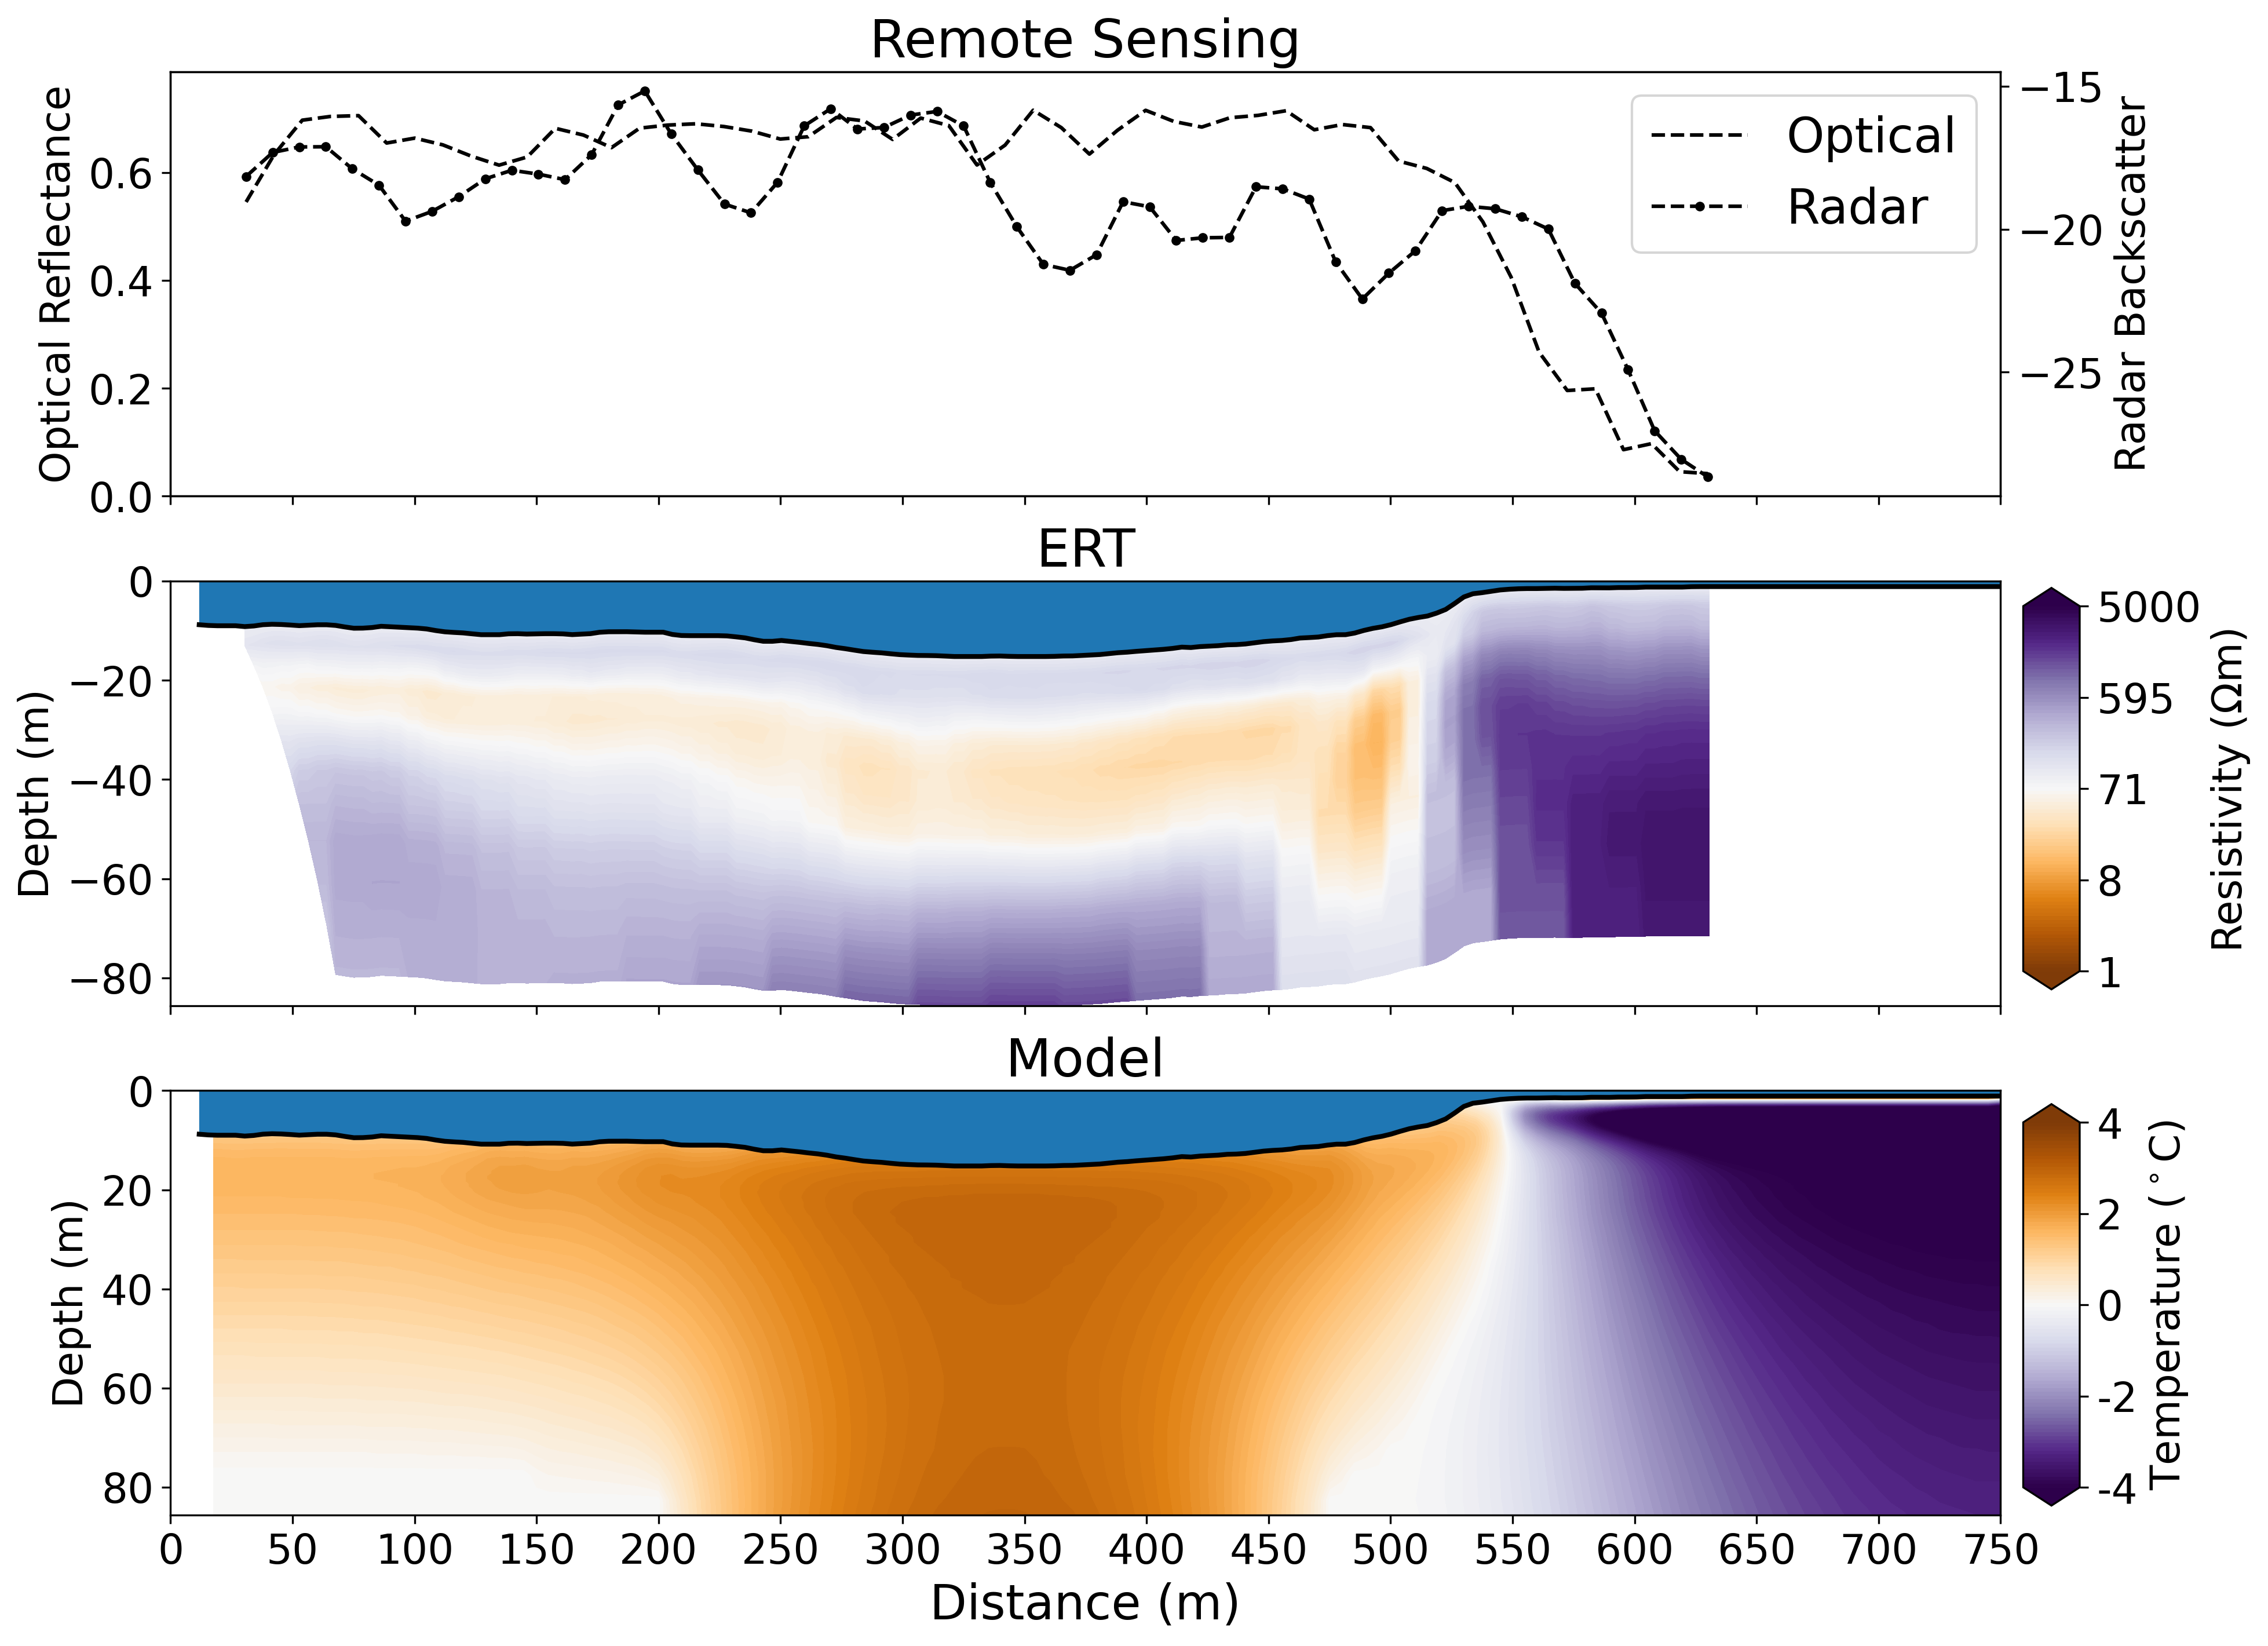

In [160]:
ERT = readERT(PathERT, "2_B")
RS = readRS(PathRS, "2_B")
Model = readMODEL(PathModel, "ECR_4")

f, (( ax0, ax1, ax2 )) = plt.subplots(3, 1,figsize=(13,11), dpi=300,sharex =True)

### Optical RS ###
ax0.set_title("Remote Sensing", fontsize=22)
ax0.plot(np.array(RS[0][::-1])+120,np.array(RS[1])/10000, "k--", label="Optical")
ax0.plot(-10000, 0.3, "k.--", label="Radar")
ax0.set_ylabel("Optical Reflectance", c= "k", fontsize=17)
ax0.set_xticks([])
ax0.tick_params(axis='both', which='major', labelsize=17)
ax0.legend(loc=1, fontsize=20)
ax0.set_ylim(0,np.nanmax(np.array(RS[1])/10000) + (np.nanmax(np.array(RS[1])/10000)*0.1))
#ax0.text(0, np.nanmax(np.array(RS[1])/10000)+0.05, "A", fontsize=30)
#ax0.invert_xaxis()
#ax0.text(1750-35, np.nanmax(np.array(RS[1])/10000)+0.05, "A'", fontsize=30)

### Radar RS ###
ax0a = ax0.twinx()
ax0a.plot(np.array(RS[2][::-1])+120,RS[3], "k.--", label="Radar")
ax0a.set_ylabel("Radar Backscatter", c= "k", fontsize=17)
ax0a.tick_params(axis='both', which='major', labelsize=17)
ax0a.invert_xaxis()

### Bathymetry Line ####
#ax0b = ax0.twinx()
#ax0b.plot(d_row[0], bathy, "k-")



####### ERT #######
ax1.set_title("ERT", fontsize=22)
cmap = mpl.cm.PuOr

min_v= np.log(1)
max_v= np.log(5000)
levels= np.linspace(min_v,max_v,100)

pcm = ax1.contourf(ERT[0], ERT[1], np.log(ERT[2]),
            cmap = cmap, vmin=min_v, vmax=max_v,
                  levels= levels,extend='both')
cbaxes = f.add_axes([0.89, 0.4, 0.025, 0.21])
cb=f.colorbar(pcm, orientation="vertical", cax = cbaxes, ticks=np.linspace(min_v, max_v, 5) )#ticks=ticks
cb.ax.set_yticklabels([str(int(round(np.exp(x), 0))) for x in np.linspace(min_v, max_v, 5)], fontsize=17)
cb.set_label("Resistivity (\u03A9m)", fontsize=17)

ax1.plot(ERT[3], ERT[4], "k-", lw=2)
ax1.fill_between(ERT[3], [0 for i in ERT[3]], ERT[4], "grey")

#ax1.set_xlim(-20,1800)
#ax1.invert_yaxis()
ax1.tick_params(axis='both', which='major', labelsize=15)

ax1.set_xticks([])
ax1.tick_params(axis='both', which='major', labelsize=17)
ax1.set_ylabel("Depth (m)", c= "k", fontsize=17)
ax1.invert_xaxis()



######## MODEL ######
ax2.set_title("Model", fontsize=22)
min_v= -4.
max_v= 4.
levels= np.linspace(min_v,max_v,100)
cmap = mpl.cm.PuOr_r

pcm = ax2.contourf(Model[0], Model[1], Model[2],
            cmap = cmap, vmin=min_v, vmax=max_v,
                  levels= levels,extend='both')

cbaxes = f.add_axes([0.89, 0.13, 0.025, 0.21]) 

cb=f.colorbar(pcm, orientation="vertical", cax = cbaxes, ticks=[-4, -2, 0, 2, 4] )
cb.ax.set_yticklabels([ -4, -2, 0, 2, 4], fontsize=17)
cb.set_label("Temperature ($^\circ$C)", fontsize=17)

ax2.plot(ERT[3], np.array(ERT[4])*-1, "k-", lw=2)
ax2.fill_between(ERT[3], [0 for i in ERT[3]], np.array(ERT[4])*-1, "grey")

ax2.set_xlabel("Distance (m)", fontsize=20)
ax2.tick_params(axis='both', which='major', labelsize=15)

ax2.set_ylabel("Depth (m)", c= "k", fontsize=17)
ax2.tick_params(axis='both', which='major', labelsize=17)
ax2.invert_yaxis()
#ax2.set_ylim(np.nanmax(ERT[1]), 0)
ax2.set_ylim(np.nanmin(ERT[1])*-1, 0)
ax2.invert_xaxis()

lenght = 750
spcing = lenght / 50 + 1
ax2.set_xlim(750,0)
ax2.xaxis.set_ticks(np.linspace(lenght, 0, int(spcing)))
ax2.set_xticklabels(list(map(int, np.linspace(0, lenght, int(spcing)))))

##############################################

plt.gcf().subplots_adjust(left=0.07, right=0.88, bottom=0.08, top = 0.93)
plt.savefig(PathFigExport + "Profile_2B.png", dpi=300)

plt.show()

# Profile 2C

/all_mounts/masp26/SMOS_artic/BennetProjects/Serpentine/data/3_ERT/cropped/2_C_ERT_Distance.csv


/home/bjuhls/.local/lib/python3.6/site-packages/ipykernel_launcher.py:50: MatplotlibDeprecationWarning: Since 3.2, the parameter *where* must have the same size as [0.0 8.63087162162162 17.26174324324324 25.89261486486486
 34.52348648648648 43.154358108108106 51.78522972972972 60.416101351351344
 69.04697297297297 77.67784459459459 86.30871621621621 94.93958783783783
 103.57045945945944 112.20133108108107 120.83220270270269
 129.4630743243243 138.09394594594593 146.72481756756756
 155.35568918918918 163.9865608108108 172.61743243243242
 181.24830405405405 189.87917567567567 198.5100472972973
 207.14091891891889 215.7717905405405 224.40266216216213
 233.03353378378375 241.66440540540538 250.295277027027 258.9261486486486
 267.55702027027024 276.18789189189187 284.8187635135135 293.4496351351351
 302.08050675675673 310.71137837837836 319.34225 327.9731216216216
 336.6039932432432 345.23486486486485 353.86573648648647 362.4966081081081
 371.1274797297297 379.75835135135134 388.38922297297

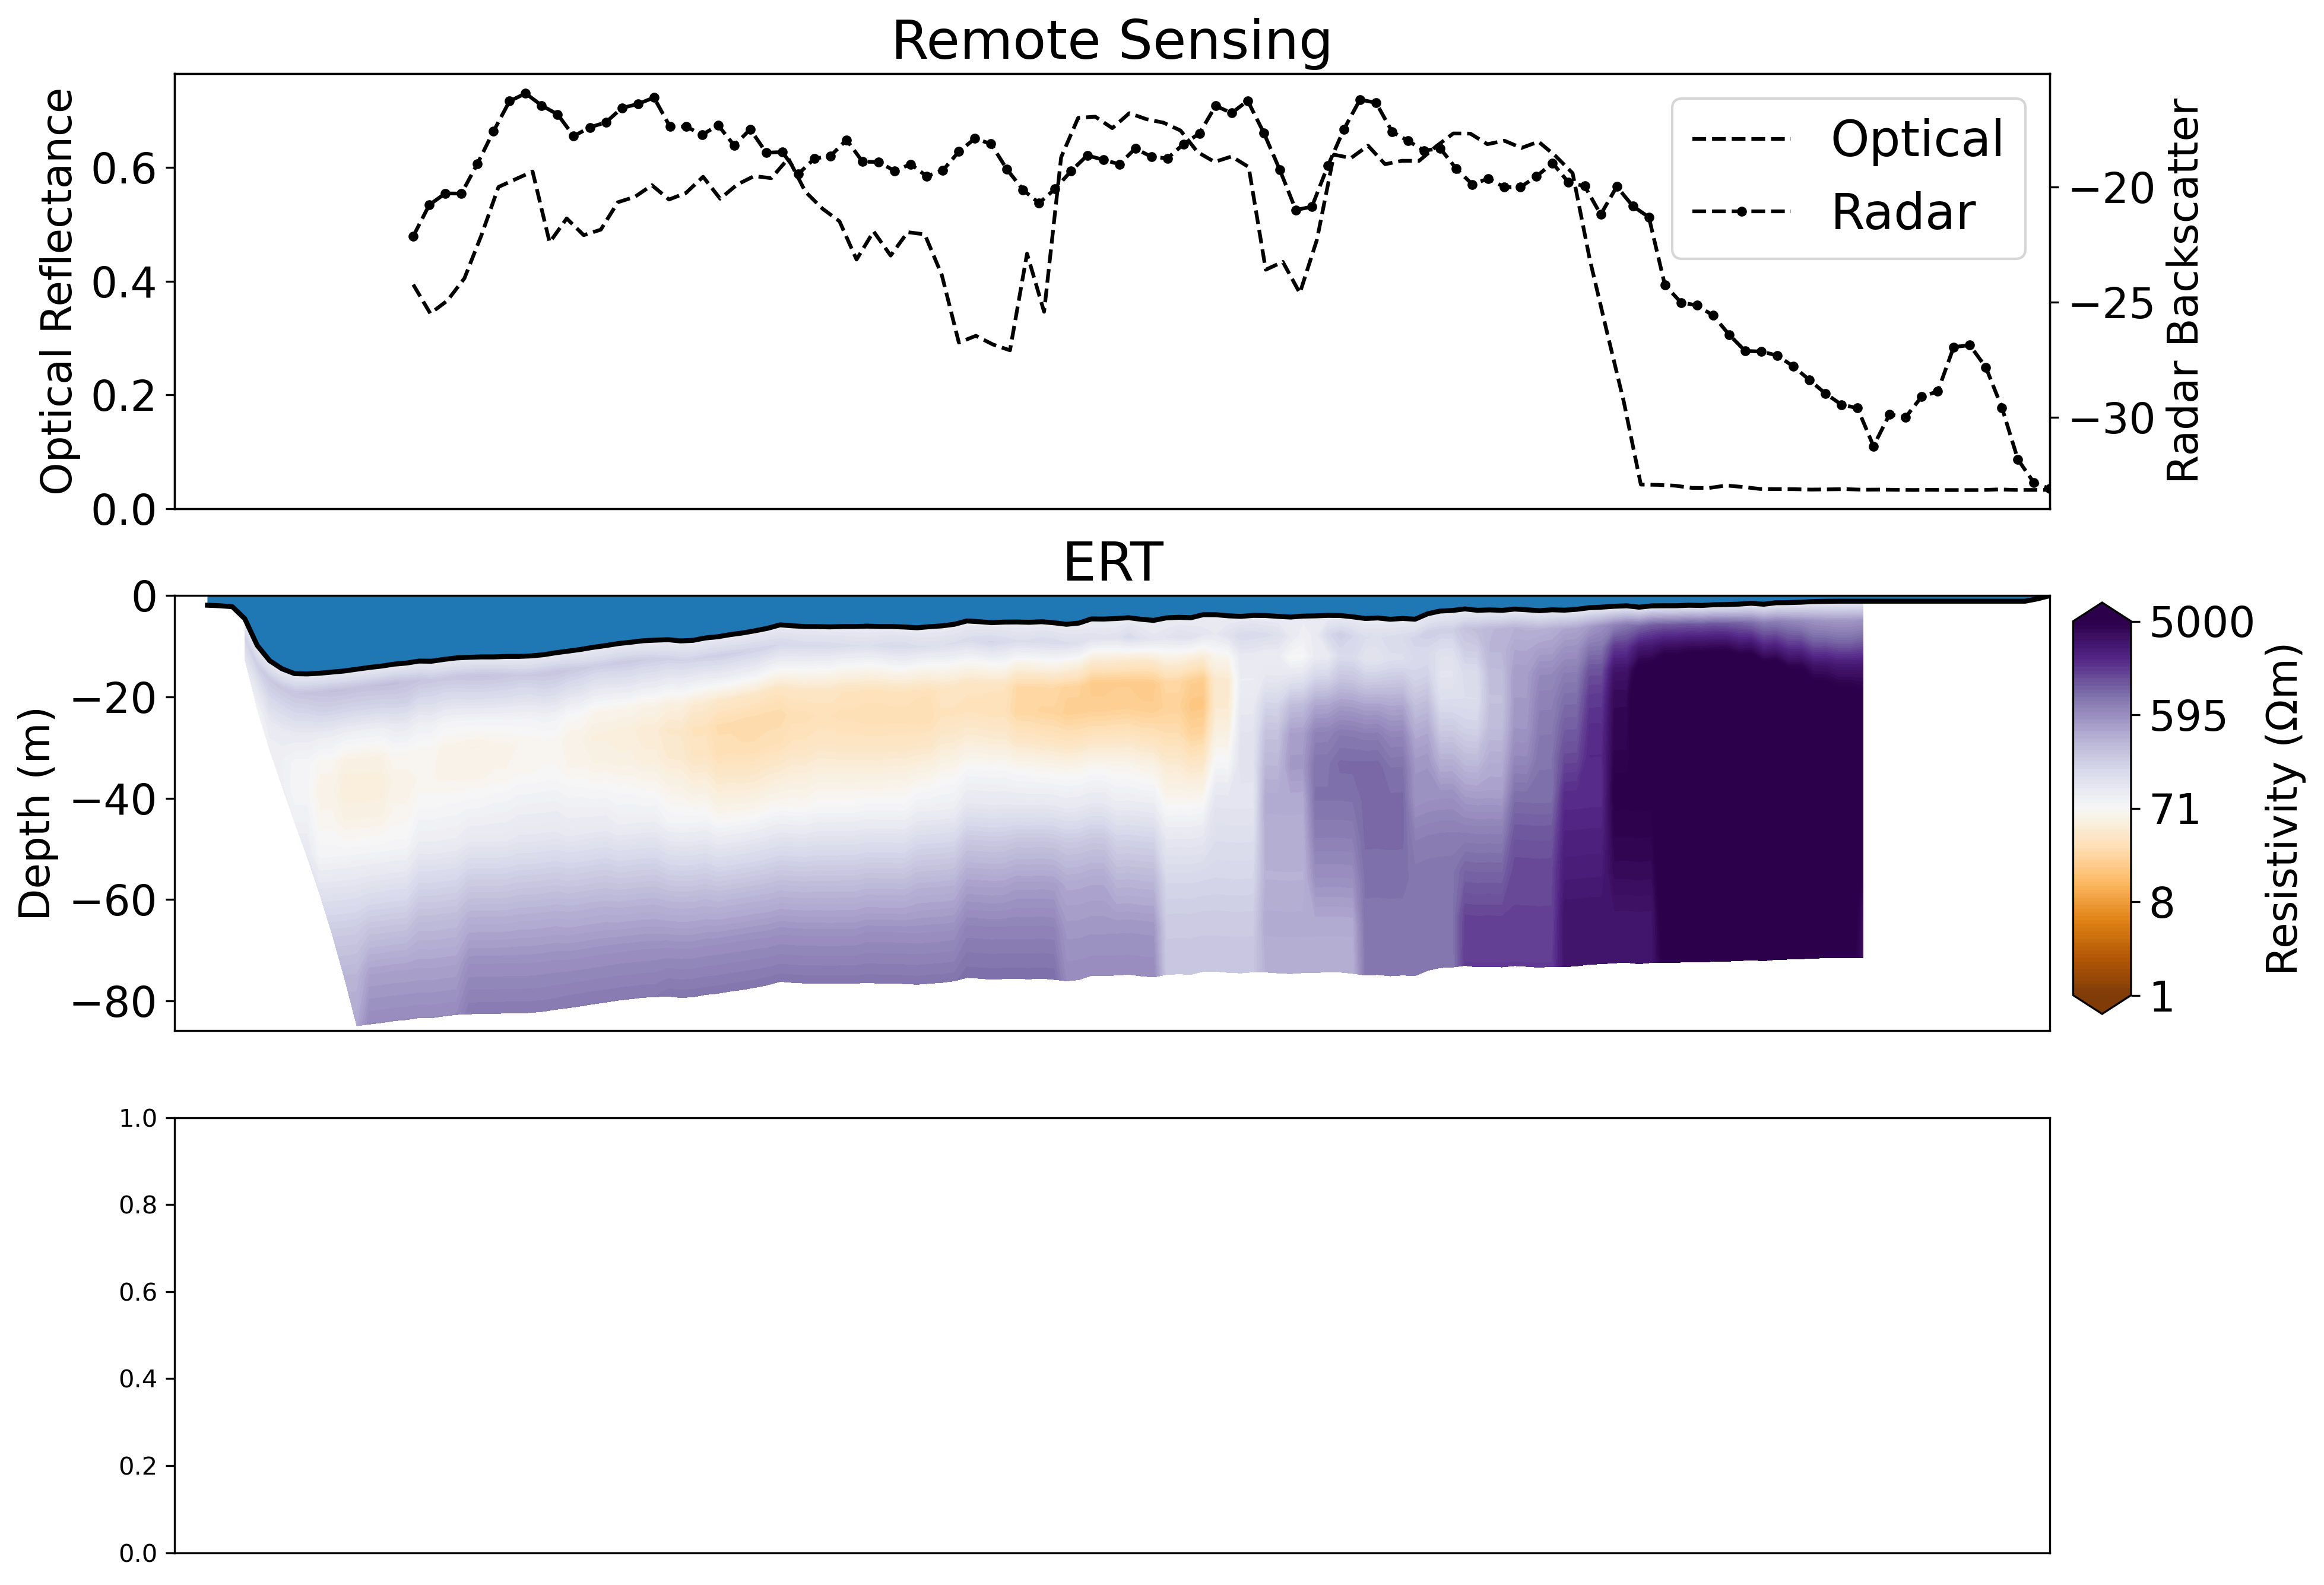

In [161]:
ERT = readERT(PathERT, "2_C")
RS = readRS(PathRS, "2_C")
#Model = readMODEL(PathModel, "ECR_5")

f, (( ax0, ax1, ax2 )) = plt.subplots(3, 1,figsize=(13,11), dpi=300,sharex =True)

### Optical RS ###
ax0.set_title("Remote Sensing", fontsize=22)
ax0.plot(RS[0][::-1],np.array(RS[1])/10000, "k--", label="Optical")
ax0.plot(-10000, 0.3, "k.--", label="Radar")
ax0.set_ylabel("Optical Reflectance", c= "k", fontsize=17)
ax0.set_xticks([])
ax0.tick_params(axis='both', which='major', labelsize=17)
ax0.legend(loc=1, fontsize=20)
ax0.set_ylim(0,np.nanmax(np.array(RS[1])/10000) + (np.nanmax(np.array(RS[1])/10000)*0.1))
#ax0.text(0, np.nanmax(np.array(RS[1])/10000)+0.05, "A", fontsize=30)
#ax0.invert_xaxis()
#ax0.text(1750-35, np.nanmax(np.array(RS[1])/10000)+0.05, "A'", fontsize=30)

### Radar RS ###
ax0a = ax0.twinx()
ax0a.plot(RS[2][::-1],RS[3], "k.--", label="Radar")
ax0a.set_ylabel("Radar Backscatter", c= "k", fontsize=17)
ax0a.tick_params(axis='both', which='major', labelsize=17)
ax0a.invert_xaxis()

### Bathymetry Line ####
#ax0b = ax0.twinx()
#ax0b.plot(d_row[0], bathy, "k-")



####### ERT #######
ax1.set_title("ERT", fontsize=22)
cmap = mpl.cm.PuOr

min_v= np.log(1)
max_v= np.log(5000)
levels= np.linspace(min_v,max_v,100)

pcm = ax1.contourf(ERT[0], ERT[1], np.log(ERT[2]),
            cmap = cmap, vmin=min_v, vmax=max_v,
                  levels= levels,extend='both')
cbaxes = f.add_axes([0.89, 0.4, 0.025, 0.21])
cb=f.colorbar(pcm, orientation="vertical", cax = cbaxes, ticks=np.linspace(min_v, max_v, 5) )#ticks=ticks
cb.ax.set_yticklabels([str(int(round(np.exp(x), 0))) for x in np.linspace(min_v, max_v, 5)], fontsize=17)
cb.set_label("Resistivity (\u03A9m)", fontsize=17)

ax1.plot(ERT[3], ERT[4], "k-", lw=2)
ax1.fill_between(ERT[3], [0 for i in ERT[3]], ERT[4], "grey")

#ax1.set_xlim(-20,1800)
#ax1.invert_yaxis()
ax1.tick_params(axis='both', which='major', labelsize=15)

ax1.set_xticks([])
ax1.tick_params(axis='both', which='major', labelsize=17)
ax1.set_ylabel("Depth (m)", c= "k", fontsize=17)
ax1.invert_xaxis()


"""
######## MODEL ######
ax2.set_title("Model", fontsize=22)
min_v= -4.
max_v= 4.
levels= np.linspace(min_v,max_v,100)
cmap = mpl.cm.PuOr_r

pcm = ax2.contourf(Model[0], Model[1], Model[2],
            cmap = cmap, vmin=min_v, vmax=max_v,
                  levels= levels,extend='both')

cbaxes = f.add_axes([0.89, 0.13, 0.025, 0.21]) 

cb=f.colorbar(pcm, orientation="vertical", cax = cbaxes, ticks=[-4, -2, 0, 2, 4] )
cb.ax.set_yticklabels([ -4, -2, 0, 2, 4], fontsize=17)
cb.set_label("Temperature ($^\circ$C)", fontsize=17)

ax2.plot(ERT[3], np.array(ERT[4])*-1, "k-", lw=2)
ax2.fill_between(ERT[3], [0 for i in ERT[3]], np.array(ERT[4])*-1, "grey")

ax2.set_xlabel("Distance (m)", fontsize=20)
ax2.tick_params(axis='both', which='major', labelsize=15)

ax2.set_ylabel("Depth (m)", c= "k", fontsize=17)
ax2.tick_params(axis='both', which='major', labelsize=17)
ax2.invert_yaxis()
#ax2.set_ylim(np.nanmax(ERT[1]), 0)
ax2.set_ylim(np.nanmin(ERT[1])*-1, 0)
ax2.invert_xaxis()

lenght = 750
spcing = lenght / 50 + 1
ax2.set_xlim(750,0)
ax2.xaxis.set_ticks(np.linspace(lenght, 0, int(spcing)))
ax2.set_xticklabels(list(map(int, np.linspace(0, lenght, int(spcing)))))

##############################################
"""
ax2.set_xlim(1300,0)
plt.gcf().subplots_adjust(left=0.07, right=0.88, bottom=0.08, top = 0.93)
plt.savefig(PathFigExport + "Profile_2C.png", dpi=300)

plt.show()

# Profile 3A

/all_mounts/masp26/SMOS_artic/BennetProjects/Serpentine/data/3_ERT/cropped/3_A_ERT_Distance.csv
RS has no optical data, filling both arrays with radar


/home/bjuhls/.local/lib/python3.6/site-packages/ipykernel_launcher.py:50: MatplotlibDeprecationWarning: Since 3.2, the parameter *where* must have the same size as [0.0 9.343438775510204 18.68687755102041 28.030316326530613
 37.37375510204082 46.717193877551026 56.06063265306123 65.40407142857143
 74.74751020408164 84.09094897959184 93.43438775510205 102.77782653061224
 112.12126530612245 121.46470408163266 130.80814285714285
 140.15158163265306 149.49502040816327 158.83845918367348
 168.1818979591837 177.5253367346939 186.8687755102041 196.21221428571428
 205.5556530612245 214.8990918367347 224.2425306122449 233.5859693877551
 242.92940816326532 252.27284693877553 261.6162857142857 270.9597244897959
 280.3031632653061 289.64660204081633 298.99004081632654
 308.33347959183675 317.67691836734696 327.02035714285716
 336.3637959183674 345.7072346938776 355.0506734693878 364.394112244898
 373.7375510204082 383.08098979591836 392.42442857142856 401.7678673469388
 411.111306122449 420.454744

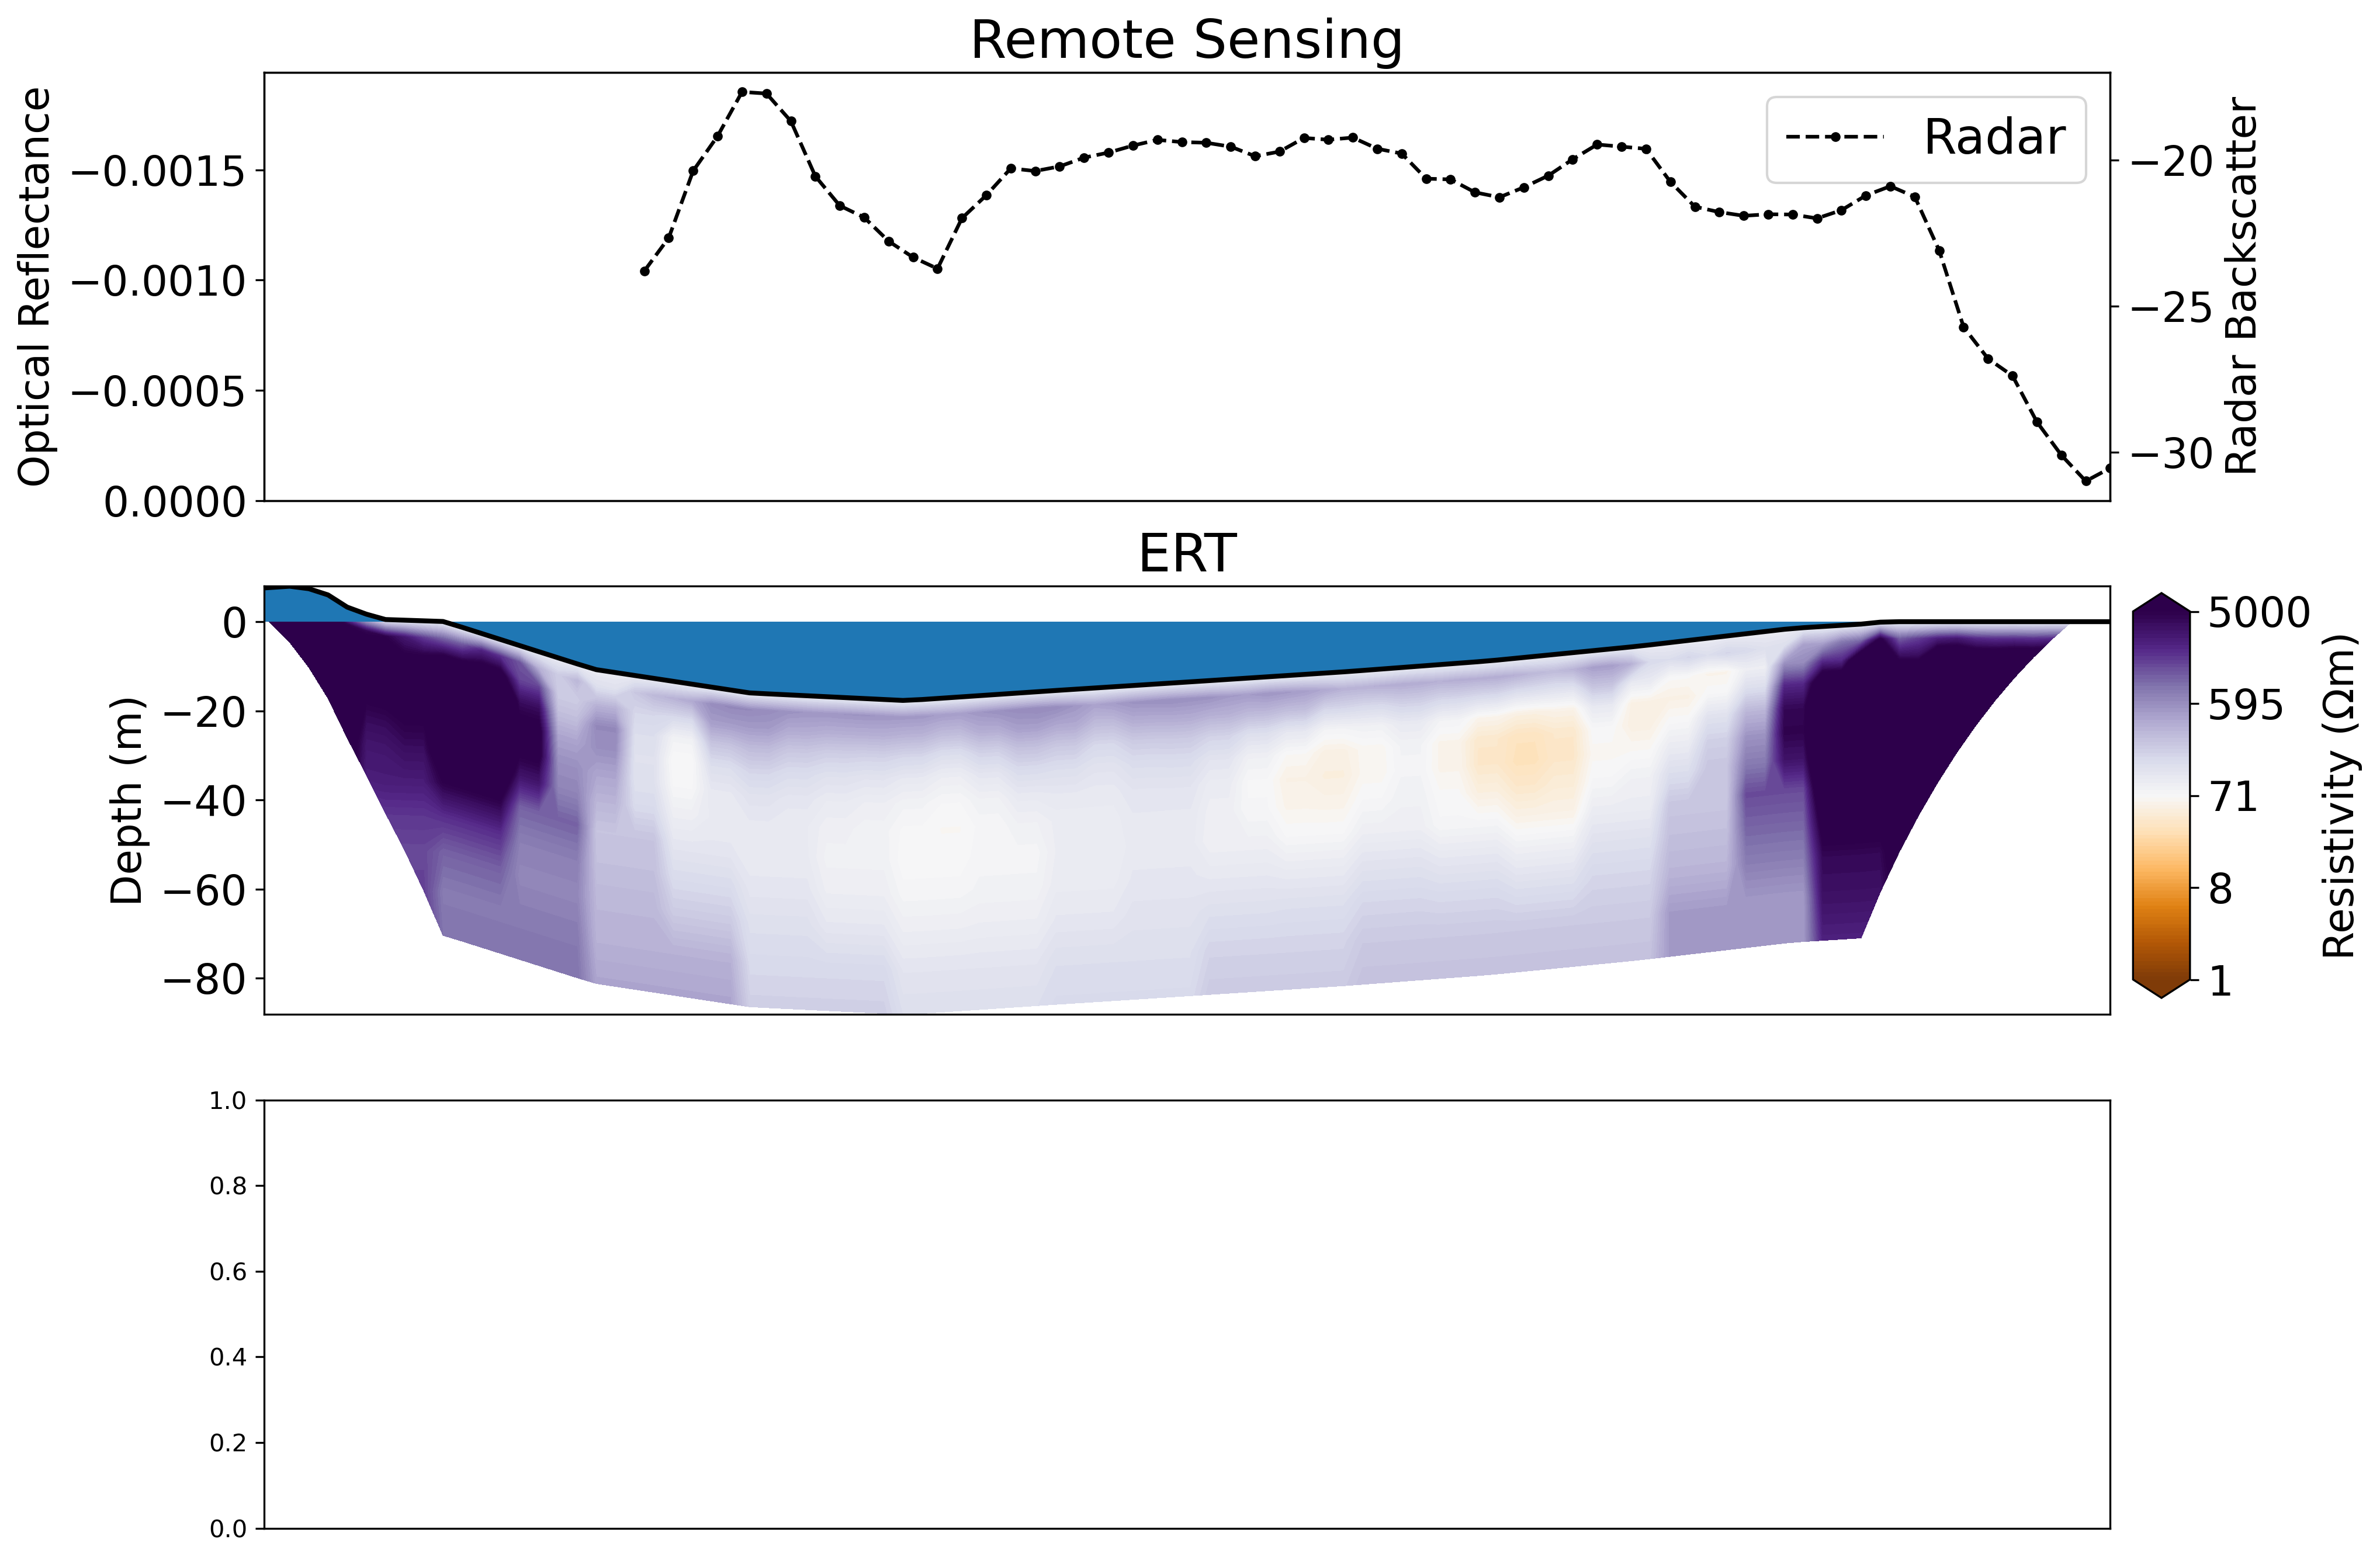

In [162]:
ERT = readERT(PathERT, "3_A")
RS = readRS(PathRS, "3_A")
#Model = readMODEL(PathModel, "ECR_5")

f, (( ax0, ax1, ax2 )) = plt.subplots(3, 1,figsize=(13,11), dpi=300,sharex =True)

### Optical RS ###
ax0.set_title("Remote Sensing", fontsize=22)
#ax0.plot(RS[0][::-1],np.array(RS[1])/10000, "k--", label="Optical")
ax0.plot(-10000, 0.3, "k.--", label="Radar")
ax0.set_ylabel("Optical Reflectance", c= "k", fontsize=17)
ax0.set_xticks([])
ax0.tick_params(axis='both', which='major', labelsize=17)
ax0.legend(loc=1, fontsize=20)
ax0.set_ylim(0,np.nanmax(np.array(RS[1])/10000) + (np.nanmax(np.array(RS[1])/10000)*0.1))
#ax0.text(0, np.nanmax(np.array(RS[1])/10000)+0.05, "A", fontsize=30)
#ax0.invert_xaxis()
#ax0.text(1750-35, np.nanmax(np.array(RS[1])/10000)+0.05, "A'", fontsize=30)

### Radar RS ###
ax0a = ax0.twinx()
ax0a.plot(RS[2][::-1],RS[3], "k.--", label="Radar")
ax0a.set_ylabel("Radar Backscatter", c= "k", fontsize=17)
ax0a.tick_params(axis='both', which='major', labelsize=17)
ax0a.invert_xaxis()

### Bathymetry Line ####
#ax0b = ax0.twinx()
#ax0b.plot(d_row[0], bathy, "k-")



####### ERT #######
ax1.set_title("ERT", fontsize=22)
cmap = mpl.cm.PuOr

min_v= np.log(1)
max_v= np.log(5000)
levels= np.linspace(min_v,max_v,100)

pcm = ax1.contourf(ERT[0], ERT[1], np.log(ERT[2]),
            cmap = cmap, vmin=min_v, vmax=max_v,
                  levels= levels,extend='both')
cbaxes = f.add_axes([0.89, 0.4, 0.025, 0.21])
cb=f.colorbar(pcm, orientation="vertical", cax = cbaxes, ticks=np.linspace(min_v, max_v, 5) )#ticks=ticks
cb.ax.set_yticklabels([str(int(round(np.exp(x), 0))) for x in np.linspace(min_v, max_v, 5)], fontsize=17)
cb.set_label("Resistivity (\u03A9m)", fontsize=17)

ax1.plot(ERT[3], ERT[4], "k-", lw=2)
ax1.fill_between(ERT[3], [0 for i in ERT[3]], ERT[4], "grey")

#ax1.set_xlim(-20,1800)
#ax1.invert_yaxis()
ax1.tick_params(axis='both', which='major', labelsize=15)

ax1.set_xticks([])
ax1.tick_params(axis='both', which='major', labelsize=17)
ax1.set_ylabel("Depth (m)", c= "k", fontsize=17)
ax1.invert_xaxis()

"""

######## MODEL ######
ax2.set_title("Model", fontsize=22)
min_v= -4.
max_v= 4.
levels= np.linspace(min_v,max_v,100)
cmap = mpl.cm.PuOr_r

pcm = ax2.contourf(Model[0], Model[1], Model[2],
            cmap = cmap, vmin=min_v, vmax=max_v,
                  levels= levels,extend='both')

cbaxes = f.add_axes([0.89, 0.13, 0.025, 0.21]) 

cb=f.colorbar(pcm, orientation="vertical", cax = cbaxes, ticks=[-4, -2, 0, 2, 4] )
cb.ax.set_yticklabels([ -4, -2, 0, 2, 4], fontsize=17)
cb.set_label("Temperature ($^\circ$C)", fontsize=17)

ax2.plot(ERT[3], np.array(ERT[4])*-1, "k-", lw=2)
ax2.fill_between(ERT[3], [0 for i in ERT[3]], np.array(ERT[4])*-1, "grey")

ax2.set_xlabel("Distance (m)", fontsize=20)
ax2.tick_params(axis='both', which='major', labelsize=15)

ax2.set_ylabel("Depth (m)", c= "k", fontsize=17)
ax2.tick_params(axis='both', which='major', labelsize=17)
ax2.invert_yaxis()
#ax2.set_ylim(np.nanmax(ERT[1]), 0)
ax2.set_ylim(np.nanmin(ERT[1])*-1, 0)
ax2.invert_xaxis()

lenght = 750
spcing = lenght / 50 + 1
ax2.set_xlim(750,0)
ax2.xaxis.set_ticks(np.linspace(lenght, 0, int(spcing)))
ax2.set_xticklabels(list(map(int, np.linspace(0, lenght, int(spcing)))))

##############################################
"""
ax2.set_xlim(900,0)
plt.gcf().subplots_adjust(left=0.07, right=0.88, bottom=0.08, top = 0.93)
plt.savefig(PathFigExport + "Profile_3A.png", dpi=300)

plt.show()

# Profile 3B

/all_mounts/masp26/SMOS_artic/BennetProjects/Serpentine/data/3_ERT/cropped/3_B_ERT_Distance.csv
RS has no optical data, filling both arrays with radar
259


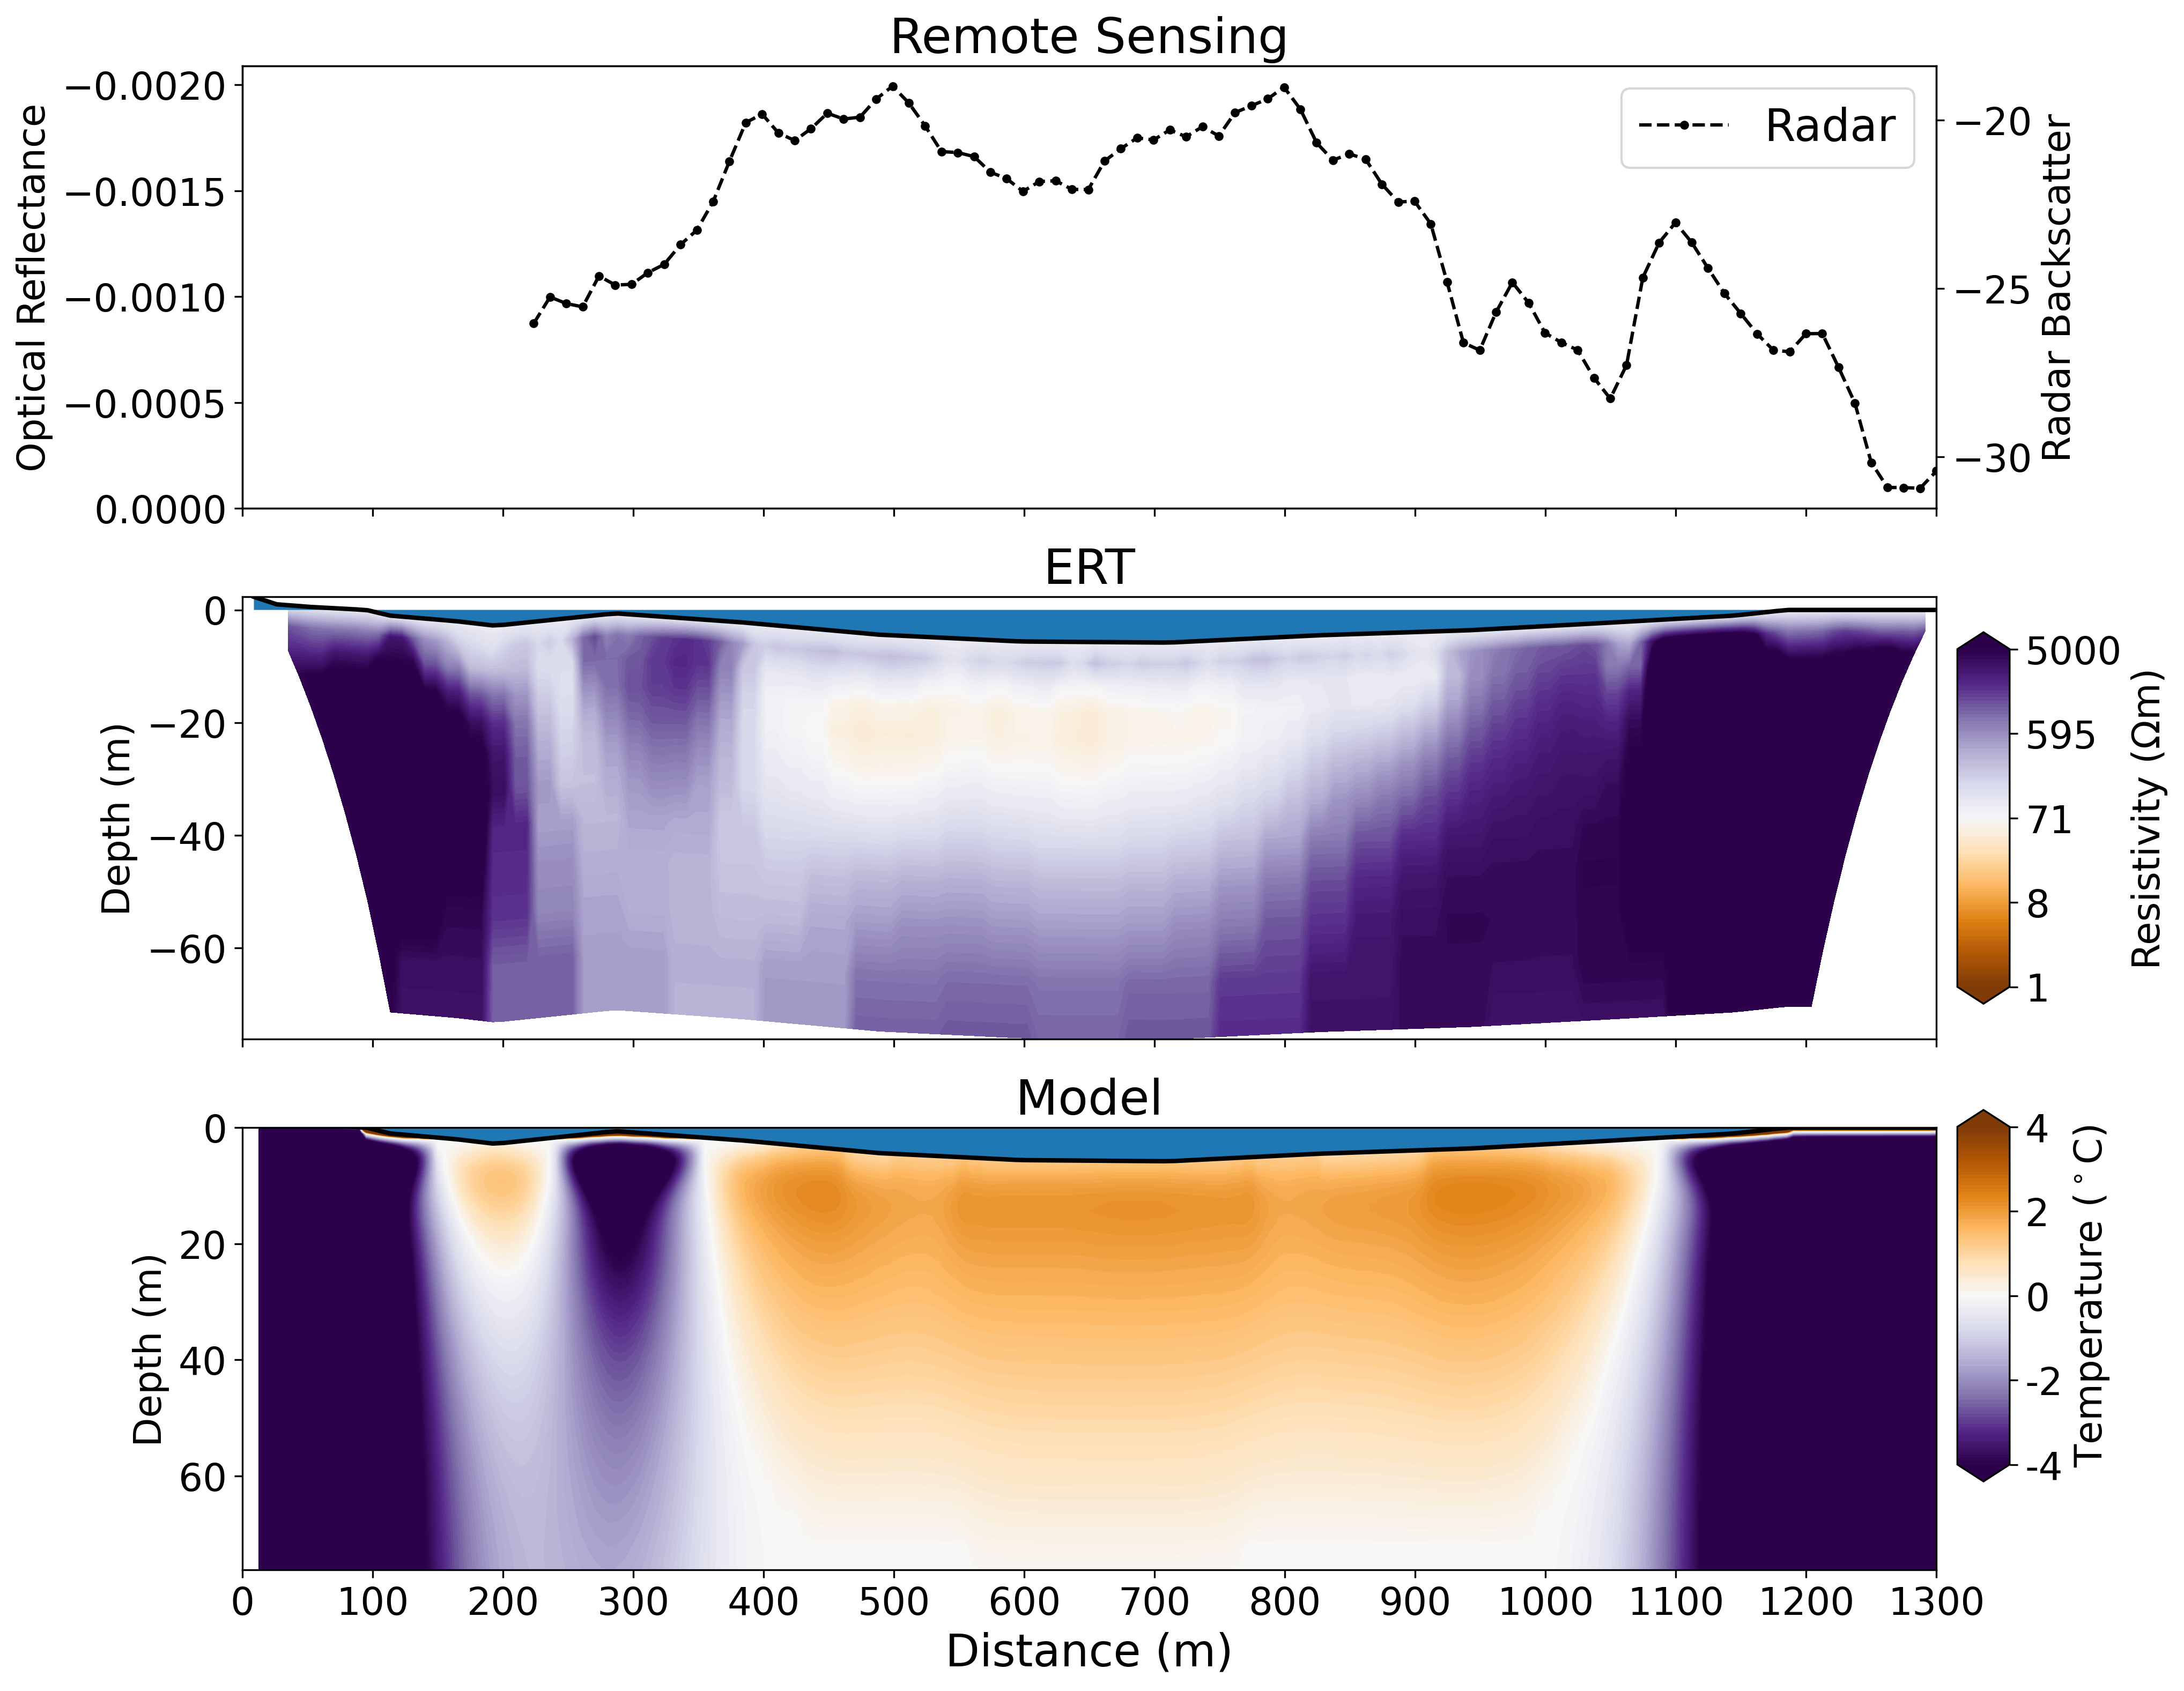

In [12]:
ERT = readERT(PathERT, "3_B")
RS = readRS(PathRS, "3_B")
Model = readMODEL(PathModel, "ECR_7")

f, (( ax0, ax1, ax2 )) = plt.subplots(3, 1,figsize=(13,11), dpi=300,sharex =True)

### Optical RS ###
ax0.set_title("Remote Sensing", fontsize=22)
#ax0.plot(RS[0][::-1],np.array(RS[1])/10000, "k--", label="Optical")
ax0.plot(-10000, 0.3, "k.--", label="Radar")
ax0.set_ylabel("Optical Reflectance", c= "k", fontsize=17)
ax0.set_xticks([])
ax0.tick_params(axis='both', which='major', labelsize=17)
ax0.legend(loc=1, fontsize=20)
ax0.set_ylim(0,np.nanmax(np.array(RS[1])/10000) + (np.nanmax(np.array(RS[1])/10000)*0.1))
#ax0.text(0, np.nanmax(np.array(RS[1])/10000)+0.05, "A", fontsize=30)
#ax0.invert_xaxis()
#ax0.text(1750-35, np.nanmax(np.array(RS[1])/10000)+0.05, "A'", fontsize=30)

### Radar RS ###
ax0a = ax0.twinx()
ax0a.plot(RS[2][::-1],RS[3], "k.--", label="Radar")
ax0a.set_ylabel("Radar Backscatter", c= "k", fontsize=17)
ax0a.tick_params(axis='both', which='major', labelsize=17)
ax0a.invert_xaxis()

### Bathymetry Line ####
#ax0b = ax0.twinx()
#ax0b.plot(d_row[0], bathy, "k-")



####### ERT #######
ax1.set_title("ERT", fontsize=22)
cmap = mpl.cm.PuOr

min_v= np.log(1)
max_v= np.log(5000)
levels= np.linspace(min_v,max_v,100)

pcm = ax1.contourf(ERT[0], ERT[1], np.log(ERT[2]),
            cmap = cmap, vmin=min_v, vmax=max_v,
                  levels= levels,extend='both')
cbaxes = f.add_axes([0.89, 0.4, 0.025, 0.21])
cb=f.colorbar(pcm, orientation="vertical", cax = cbaxes, ticks=np.linspace(min_v, max_v, 5) )#ticks=ticks
cb.ax.set_yticklabels([str(int(round(np.exp(x), 0))) for x in np.linspace(min_v, max_v, 5)], fontsize=17)
cb.set_label("Resistivity (\u03A9m)", fontsize=17)

ax1.plot(ERT[3], ERT[4], "k-", lw=2)
ax1.fill_between(ERT[3], [0 for i in ERT[3]], ERT[4], "grey")

#ax1.set_xlim(-20,1800)
#ax1.invert_yaxis()
ax1.tick_params(axis='both', which='major', labelsize=15)

ax1.set_xticks([])
ax1.tick_params(axis='both', which='major', labelsize=17)
ax1.set_ylabel("Depth (m)", c= "k", fontsize=17)
ax1.invert_xaxis()



######## MODEL ######
ax2.set_title("Model", fontsize=22)
min_v= -4.
max_v= 4.
levels= np.linspace(min_v,max_v,100)
cmap = mpl.cm.PuOr_r

pcm = ax2.contourf(Model[0], Model[1], Model[2],
            cmap = cmap, vmin=min_v, vmax=max_v,
                  levels= levels,extend='both')

cbaxes = f.add_axes([0.89, 0.13, 0.025, 0.21]) 

cb=f.colorbar(pcm, orientation="vertical", cax = cbaxes, ticks=[-4, -2, 0, 2, 4] )
cb.ax.set_yticklabels([ -4, -2, 0, 2, 4], fontsize=17)
cb.set_label("Temperature ($^\circ$C)", fontsize=17)

ax2.plot(ERT[3], np.array(ERT[4])*-1, "k-", lw=2)
ax2.fill_between(ERT[3], [0 for i in ERT[3]], np.array(ERT[4])*-1, "grey")

ax2.set_xlabel("Distance (m)", fontsize=20)
ax2.tick_params(axis='both', which='major', labelsize=15)

ax2.set_ylabel("Depth (m)", c= "k", fontsize=17)
ax2.tick_params(axis='both', which='major', labelsize=17)
ax2.invert_yaxis()
#ax2.set_ylim(np.nanmax(ERT[1]), 0)
ax2.set_ylim(np.nanmin(ERT[1])*-1, 0)
ax2.invert_xaxis()

lenght = 1300
spcing = lenght / 100 + 1
ax2.set_xlim(1300,0)
ax2.xaxis.set_ticks(np.linspace(lenght, 0, int(spcing)))
ax2.set_xticklabels(list(map(int, np.linspace(0, lenght, int(spcing)))))

##############################################

#ax2.set_xlim(900,0)
plt.gcf().subplots_adjust(left=0.07, right=0.88, bottom=0.08, top = 0.93)
plt.savefig(PathFigExport + "Profile_3B.png", dpi=300)

plt.show()